# 6.2 Exploring Relationships

### This script contains the following:

#### 1. Importing Visualization Libraries and Data
#### 2. Data Cleaning
#### 3. Exploring Relationships
     Pair Plots
     Categorical Plots
     Bar Plots
     Creating categories for the ratings 1-10
     Renaming Countries
     Creating a Continent column
#### 4. Questions and Answers 

### 1. Importing Visualization Libraries and Data

In [1]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import ipywidgets as widgets
from IPython.display import display, clear_output

import os, sys
import re

In [2]:
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Import Prepared Data (Path)

path = r'/Users/ladyarmanoid/Documents/Data Analytics/CareerFoundry/Course/2- Data Immersion/Achievement 6/Book Recommendation Analysis/'

# Import data

df = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'books_ratings_users.pkl'))

### 2. Data Cleaning

#### Dropping Columns:

In [4]:
df.shape

(1149780, 12)

In [5]:
df.columns

Index(['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher',
       'User-ID', 'Book-Rating', 'Location', 'Age', 'City', 'Country',
       '_merge'],
      dtype='object')

In [6]:
df.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,User-ID,Book-Rating,Location,Age,City,Country,_merge
0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,2.0,0.0,"stockton, california, usa",18,stockton,usa,both
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,8.0,5.0,"timmins, ontario, canada",34,timmins,canada,both
2,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial,8.0,0.0,"timmins, ontario, canada",34,timmins,canada,both
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux,8.0,0.0,"timmins, ontario, canada",34,timmins,canada,both
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999.0,W. W. Norton &amp; Company,8.0,0.0,"timmins, ontario, canada",34,timmins,canada,both


In [7]:
# Drop column '_merge' as no longer needed

df = df.drop(columns =['_merge'])

# Check output

df.columns

Index(['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher',
       'User-ID', 'Book-Rating', 'Location', 'Age', 'City', 'Country'],
      dtype='object')

In [8]:
df.dtypes

ISBN                  object
bookTitle             object
bookAuthor            object
yearOfPublication    float64
publisher             object
User-ID              float64
Book-Rating          float64
Location              object
Age                    int32
City                  object
Country               object
dtype: object

#### Missing Values Check:

In [9]:
# Check for missing values

df.isnull().sum()

# No missing values for the main variables
# The missing values found for the 'bookTitle', 'bookAuthor', and 'publisher' have no impact
# The missing values for 'yearOfPublication' will be addressed

ISBN                      0
bookTitle            118644
bookAuthor           118644
yearOfPublication    118644
publisher            118644
User-ID                   0
Book-Rating               0
Location                  0
Age                       0
City                      0
Country                   0
dtype: int64

In [10]:
# Find duplicates

df_dups = df[df.duplicated()]

In [11]:
df_dups.shape # No duplicates!

(0, 11)

In [12]:
#### Mixed-Type Data:

In [13]:
for col in df.columns.tolist():
      weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
      if len (df[weird]) > 0:
        print (col)
        
# Mixed-type columns for 'bookTitle', 'bookAuthor' and 'publisher'
# The three columns are showing NaN values

/var/folders/bx/5gbvgdk148552knvq9wj8vgm0000gn/T/ipykernel_10365/106746206.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
/var/folders/bx/5gbvgdk148552knvq9wj8vgm0000gn/T/ipykernel_10365/106746206.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)


bookTitle
bookAuthor


/var/folders/bx/5gbvgdk148552knvq9wj8vgm0000gn/T/ipykernel_10365/106746206.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
/var/folders/bx/5gbvgdk148552knvq9wj8vgm0000gn/T/ipykernel_10365/106746206.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
/var/folders/bx/5gbvgdk148552knvq9wj8vgm0000gn/T/ipykernel_10365/106746206.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
/var/folders/bx/5gbvgdk148552knvq9wj8vgm0000gn/T/ipykernel_10365/106746206.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)


publisher


/var/folders/bx/5gbvgdk148552knvq9wj8vgm0000gn/T/ipykernel_10365/106746206.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
/var/folders/bx/5gbvgdk148552knvq9wj8vgm0000gn/T/ipykernel_10365/106746206.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
/var/folders/bx/5gbvgdk148552knvq9wj8vgm0000gn/T/ipykernel_10365/106746206.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
/var/folders/bx/5gbvgdk148552knvq9wj8vgm0000gn/T/ipykernel_10365/106746206.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
/var/folders

In [14]:
df['bookTitle']

0                                        Classical Mythology
1                                               Clara Callan
2                                       Decision in Normandy
3          Flu: The Story of the Great Influenza Pandemic...
4                                     The Mummies of Urumchi
                                 ...                        
1149775                                                  NaN
1149776                                                  NaN
1149777                                                  NaN
1149778                                                  NaN
1149779                                                  NaN
Name: bookTitle, Length: 1149780, dtype: object

In [15]:
df['bookAuthor']

0            Mark P. O. Morford
1          Richard Bruce Wright
2                  Carlo D'Este
3              Gina Bari Kolata
4               E. J. W. Barber
                   ...         
1149775                     NaN
1149776                     NaN
1149777                     NaN
1149778                     NaN
1149779                     NaN
Name: bookAuthor, Length: 1149780, dtype: object

In [16]:
df['publisher']

0             Oxford University Press
1               HarperFlamingo Canada
2                     HarperPerennial
3                Farrar Straus Giroux
4          W. W. Norton &amp; Company
                      ...            
1149775                           NaN
1149776                           NaN
1149777                           NaN
1149778                           NaN
1149779                           NaN
Name: publisher, Length: 1149780, dtype: object

#### Replacing NaN with 'Unknown' on Multiple Columns

In [17]:
# Using multiple columns

df2 = df[['bookTitle','bookAuthor', 'publisher' ]] = df[['bookTitle','bookAuthor', 'publisher' ]].fillna('Unknown')
print("After replacing the NaN values", df2)

After replacing the NaN values                                                  bookTitle  \
0                                      Classical Mythology   
1                                             Clara Callan   
2                                     Decision in Normandy   
3        Flu: The Story of the Great Influenza Pandemic...   
4                                   The Mummies of Urumchi   
...                                                    ...   
1149775                                            Unknown   
1149776                                            Unknown   
1149777                                            Unknown   
1149778                                            Unknown   
1149779                                            Unknown   

                   bookAuthor                   publisher  
0          Mark P. O. Morford     Oxford University Press  
1        Richard Bruce Wright       HarperFlamingo Canada  
2                Carlo D'Este             Ha

In [18]:
df2.tail()

,bookTitle,bookAuthor,publisher
1149775,Unknown,Unknown,Unknown
1149776,Unknown,Unknown,Unknown
1149777,Unknown,Unknown,Unknown
1149778,Unknown,Unknown,Unknown
1149779,Unknown,Unknown,Unknown


In [19]:
df2.columns

Index(['bookTitle', 'bookAuthor', 'publisher'], dtype='object')

In [20]:
df.tail()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,User-ID,Book-Rating,Location,Age,City,Country
1149775,8886661975,Unknown,Unknown,NaN,Unknown,276448.0,10.0,"torre del greco, campania, italy",34,torre del greco,italy
1149776,7222025634,Unknown,Unknown,NaN,Unknown,276638.0,10.0,"shanghai, n/a, china",32,shanghai,china
1149777,0533233661,Unknown,Unknown,NaN,Unknown,276663.0,5.0,"santiago de compostela, galicia, spain",20,santiago de compostela,spain
1149778,3423120754,Unknown,Unknown,NaN,Unknown,276668.0,8.0,"mülheim an der ruhr, nordrhein-westfalen, germany",34,mülheim an der ruhr,germany
1149779,05162443314,Unknown,Unknown,NaN,Unknown,276723.0,8.0,"san antonio, texas, usa",12,san antonio,usa


In [21]:
df['bookTitle']

0                                        Classical Mythology
1                                               Clara Callan
2                                       Decision in Normandy
3          Flu: The Story of the Great Influenza Pandemic...
4                                     The Mummies of Urumchi
                                 ...                        
1149775                                              Unknown
1149776                                              Unknown
1149777                                              Unknown
1149778                                              Unknown
1149779                                              Unknown
Name: bookTitle, Length: 1149780, dtype: object

In [22]:
df['bookAuthor']

0            Mark P. O. Morford
1          Richard Bruce Wright
2                  Carlo D'Este
3              Gina Bari Kolata
4               E. J. W. Barber
                   ...         
1149775                 Unknown
1149776                 Unknown
1149777                 Unknown
1149778                 Unknown
1149779                 Unknown
Name: bookAuthor, Length: 1149780, dtype: object

In [23]:
df['publisher']

0             Oxford University Press
1               HarperFlamingo Canada
2                     HarperPerennial
3                Farrar Straus Giroux
4          W. W. Norton &amp; Company
                      ...            
1149775                       Unknown
1149776                       Unknown
1149777                       Unknown
1149778                       Unknown
1149779                       Unknown
Name: publisher, Length: 1149780, dtype: object

#### Separating the implicit and explicit ratings

As quoted in the descriptive analysis of the dataset - BX-Book-Ratings contains the book rating information. Ratings are either explicit, expressed on a scale from 1-10 higher values denoting higher appreciation, or implicit, expressed by 0

In [24]:
df['Book-Rating'].unique()

array([ 0.,  5.,  6.,  7.,  9.,  8., 10.,  3.,  1.,  4.,  2.])

In [25]:
# Creating subsets to only use the 'ratings_explicit' dataframe

ratings_explicit = df[df['Book-Rating'] != 0]
ratings_implicit = df[df['Book-Rating'] == 0]

In [26]:
# Check for missing values in 'ratings_explicit'

ratings_explicit.isnull().sum()

ISBN                     0
bookTitle                0
bookAuthor               0
yearOfPublication    49829
publisher                0
User-ID                  0
Book-Rating              0
Location                 0
Age                      0
City                     0
Country                  0
dtype: int64

In [27]:
ratings_explicit['yearOfPublication'].info # The 'yearOfPublication' variable has NaN values

<bound method Series.info of 1          2001.0
9          2002.0
12         2004.0
13         1999.0
15         1998.0
            ...  
1149775       NaN
1149776       NaN
1149777       NaN
1149778       NaN
1149779       NaN
Name: yearOfPublication, Length: 433671, dtype: float64>

In [28]:
ratings_explicit['yearOfPublication'].value_counts(dropna = False)

yearOfPublication
NaN       49829
2002.0    37986
2001.0    32331
2003.0    29166
1999.0    29100
          ...  
1806.0        1
1934.0        1
1378.0        1
1904.0        1
1376.0        1
Name: count, Length: 96, dtype: int64

In [29]:
# Create a dataframe for the missing values in 'yearOfPublication'

ratings_explicit_nan = ratings_explicit[ratings_explicit['yearOfPublication'].isnull() == True]

# Check output

ratings_explicit_nan

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,User-ID,Book-Rating,Location,Age,City,Country
81,01402.5448X,Unknown,Unknown,NaN,Unknown,11400.0,10.0,"ottawa, ontario, canada",49,ottawa,canada
82,0224061089,Unknown,Unknown,NaN,Unknown,11400.0,7.0,"ottawa, ontario, canada",49,ottawa,canada
83,0316666346,Unknown,Unknown,NaN,Unknown,11400.0,9.0,"ottawa, ontario, canada",49,ottawa,canada
11230,3442437407,Unknown,Unknown,NaN,Unknown,11676.0,8.0,"n/a, n/a, n/a",34,n/a,n/a
11231,8423314901,Unknown,Unknown,NaN,Unknown,11676.0,3.0,"n/a, n/a, n/a",34,n/a,n/a
...,...,...,...,...,...,...,...,...,...,...,...
1149775,8886661975,Unknown,Unknown,NaN,Unknown,276448.0,10.0,"torre del greco, campania, italy",34,torre del greco,italy
1149776,7222025634,Unknown,Unknown,NaN,Unknown,276638.0,10.0,"shanghai, n/a, china",32,shanghai,china
1149777,0533233661,Unknown,Unknown,NaN,Unknown,276663.0,5.0,"santiago de compostela, galicia, spain",20,santiago de compostela,spain
1149778,3423120754,Unknown,Unknown,NaN,Unknown,276668.0,8.0,"mülheim an der ruhr, nordrhein-westfalen, germany",34,mülheim an der ruhr,germany


In [30]:
# Change 'yearOfPublication' with all values as integers

ratings_explicit.yearOfPublication = pd.to_numeric(ratings_explicit.yearOfPublication, errors='coerce')

print(sorted(ratings_explicit['yearOfPublication'].unique()))

[1920.0, 1930.0, 1953.0, 1955.0, 1957.0, 1958.0, 1959.0, 1960.0, 1963.0, 1964.0, 1965.0, 1966.0, 1970.0, 1971.0, 1972.0, 1973.0, 1974.0, 1975.0, 1976.0, 1977.0, 1978.0, 1979.0, 1980.0, 1981.0, 1982.0, 1983.0, 1984.0, 1985.0, 1986.0, 1987.0, 1988.0, 1989.0, 1990.0, 1991.0, 1992.0, 1993.0, 1994.0, 1995.0, 1996.0, 1997.0, 1998.0, 1999.0, 2000.0, 2001.0, 2002.0, 2003.0, 2004.0, nan, 1376.0, 1378.0, 1806.0, 1900.0, 1901.0, 1902.0, 1904.0, 1906.0, 1908.0, 1911.0, 1923.0, 1924.0, 1925.0, 1926.0, 1927.0, 1928.0, 1929.0, 1931.0, 1932.0, 1933.0, 1934.0, 1935.0, 1936.0, 1937.0, 1938.0, 1939.0, 1940.0, 1941.0, 1942.0, 1943.0, 1944.0, 1945.0, 1946.0, 1947.0, 1948.0, 1949.0, 1950.0, 1951.0, 1952.0, 1954.0, 1956.0, 1961.0, 1962.0, 1967.0, 1968.0, 1969.0, 2005.0, 2006.0]


/var/folders/bx/5gbvgdk148552knvq9wj8vgm0000gn/T/ipykernel_10365/1185827426.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratings_explicit.yearOfPublication = pd.to_numeric(ratings_explicit.yearOfPublication, errors='coerce')


In [31]:
# Replacing NaNs with mean value of yearOfPublication

ratings_explicit.yearOfPublication.fillna(round(ratings_explicit.yearOfPublication.mean()), inplace = True)

/var/folders/bx/5gbvgdk148552knvq9wj8vgm0000gn/T/ipykernel_10365/3372698793.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratings_explicit.yearOfPublication.fillna(round(ratings_explicit.yearOfPublication.mean()), inplace = True)


In [32]:
ratings_explicit['yearOfPublication'].info

<bound method Series.info of 1          2001.0
9          2002.0
12         2004.0
13         1999.0
15         1998.0
            ...  
1149775    1996.0
1149776    1996.0
1149777    1996.0
1149778    1996.0
1149779    1996.0
Name: yearOfPublication, Length: 433671, dtype: float64>

In [33]:
# Recheck for missing values in 'ratings_explicit'

ratings_explicit.isnull().sum()

ISBN                 0
bookTitle            0
bookAuthor           0
yearOfPublication    0
publisher            0
User-ID              0
Book-Rating          0
Location             0
Age                  0
City                 0
Country              0
dtype: int64

### 3. Exploring Relationships

Create a correlation matrix heatmap (colored).
Discuss what the coefficients in the plot mean in terms of the relationships between the variables.

#### Variables: Age, Book ratings and Year of Publication

To create a subplot, we can only use the numerical data available.

In [34]:
# Create a subset excluding the following columns
# Columns =>'ISBN', 'bookTitle', 'bookAuthor', 'publisher', 'User-ID', 'Location', 'City', 'Country'

sub = ratings_explicit[['Age', 'Book-Rating', 'yearOfPublication']]

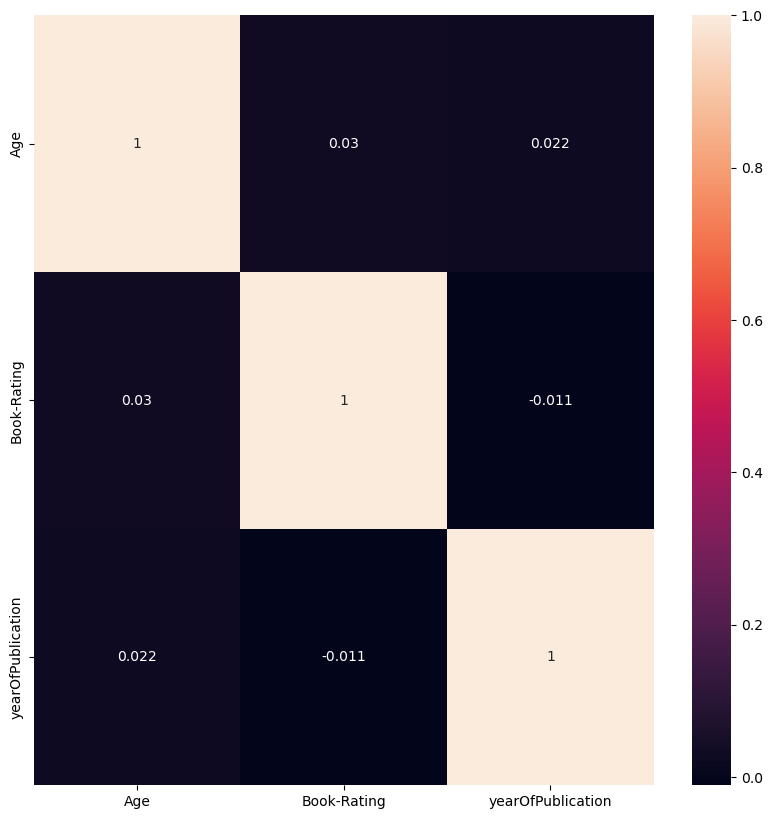

In [35]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

#### We have few numerical variables available in that data set. The heat map was created based on the following variables:
* Book Rating
* Year of Publication
* Age

#### What we tried to establish is if there is any type of correlation between:
* The rating and the age of the reader
* The rating and the year of publication
* The age and the year of publication

1. With "Book-Rating" & "Age": A 0.03 coefficient corrobates that ther is no correlation.

2. With "yearOfPublication" & "Book-Rating": A -0.011 coefficient indicates a negative and very low relationship.

3. With "Age" & "yearOfPublication": A 0.022 coefficient confirms also no relationship between the age of the reader and the year of publication.

### Scatterplots:

Create a scatterplot (or plots) for the variables with the strongest correlations and examine the nature of their relationships. Discuss the output in a markdown cell.

In [36]:
ratings_explicit['Age'].unique()

array([34, 49, 30, 36, 29, 60, 27, 71, 40, 53, 65, 46, 47, 26, 56, 37, 39,
       25, 31, 41, 20, 58, 42, 38, 52, 21, 22, 33, 19, 57, 51, 35, 32, 62,
       45, 74, 44, 43, 68, 54, 55, 24, 18, 59, 28, 70, 17, 48, 14, 50, 16,
       61, 15, 66, 67, 23, 84, 82,  9, 72, 81, 64, 75, 69, 73, 63, 13, 77,
        7, 76, 12, 90, 79, 80, 78, 83,  8, 11, 10,  5, 85, 86,  6, 89],
      dtype=int32)

In [37]:
#### Create age groups

# Age group -> 5 to 18 years old

ratings_explicit.loc[(ratings_explicit['Age'] >= 5) & (ratings_explicit['Age'] <= 18), 'Age Group'] = '5-18 years old'

# Age group -> 19 to 35 years old

ratings_explicit.loc[(ratings_explicit['Age'] >= 19) & (ratings_explicit['Age'] <= 35), 'Age Group'] = '19-35 years old'

# Age group -> 36 to 55 years old

ratings_explicit.loc[(ratings_explicit['Age'] >= 36) & (ratings_explicit['Age'] <= 55), 'Age Group'] = '36-55 years old'

# Age group -> 56 to 74 years old

ratings_explicit.loc[(ratings_explicit['Age'] >= 56) & (ratings_explicit['Age'] <= 74), 'Age Group'] = '56-74 years old'

# Age group -> 75 to 90 years old

ratings_explicit.loc[(ratings_explicit['Age'] >= 75) & (ratings_explicit['Age'] <= 90), 'Age Group'] = '75-90 years old'

/var/folders/bx/5gbvgdk148552knvq9wj8vgm0000gn/T/ipykernel_10365/742962825.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratings_explicit.loc[(ratings_explicit['Age'] >= 5) & (ratings_explicit['Age'] <= 18), 'Age Group'] = '5-18 years old'


/Users/ladyarmanoid/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


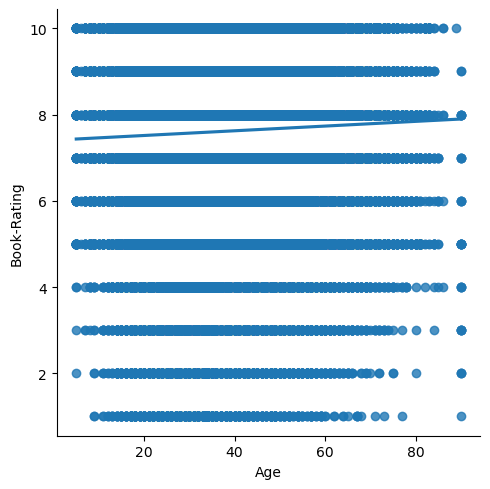

In [38]:
# Create a scatterplot for the "Age" and "Book-Rating" columns in seaborn

sns.lmplot(x = 'Age', y = 'Book-Rating', data = ratings_explicit)

The scatterplot between the 'Age' and 'Book-Rating' variables is uneventful and does not showcase any relationships.

### Pair Plots:

Create a pair plot of the entire data set.
Comment on the distribution of the variables and mark variables you’d like to explore further with an explanation of why.

In [39]:
# Keep only the variables you want to use in the pair plot

sub_2 = sub[['Age', 'Book-Rating', 'yearOfPublication']]

/Users/ladyarmanoid/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ladyarmanoid/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ladyarmanoid/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ladyarmanoid/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tig

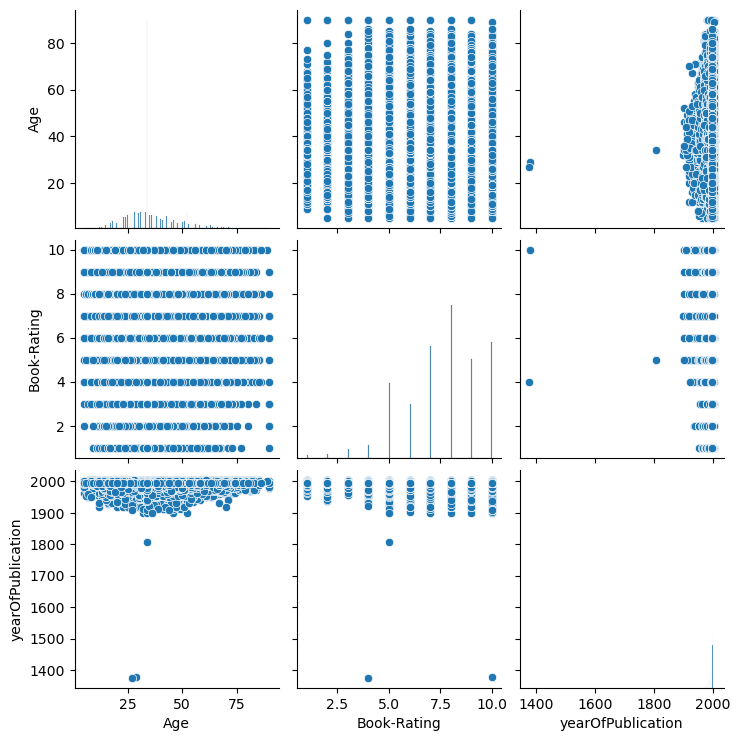

In [40]:
# Create a pair plot 

g = sns.pairplot(sub_2)

#### The pair plots are showcasing the story of the data:
* We can see that the majority of the books published happened in the 20th and 21st century,
with only a few havimng been published earlier
* The book ratings follow the same trend

### Categorical Plots:

Create a categorical plot and interpret the results.

(433671, 12)
(716109, 11)


/var/folders/bx/5gbvgdk148552knvq9wj8vgm0000gn/T/ipykernel_10365/1937208111.py:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data = ratings_explicit,  x = 'Book-Rating', bins = 20, kde = True,  palette = 'rocket_r')
/Users/ladyarmanoid/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


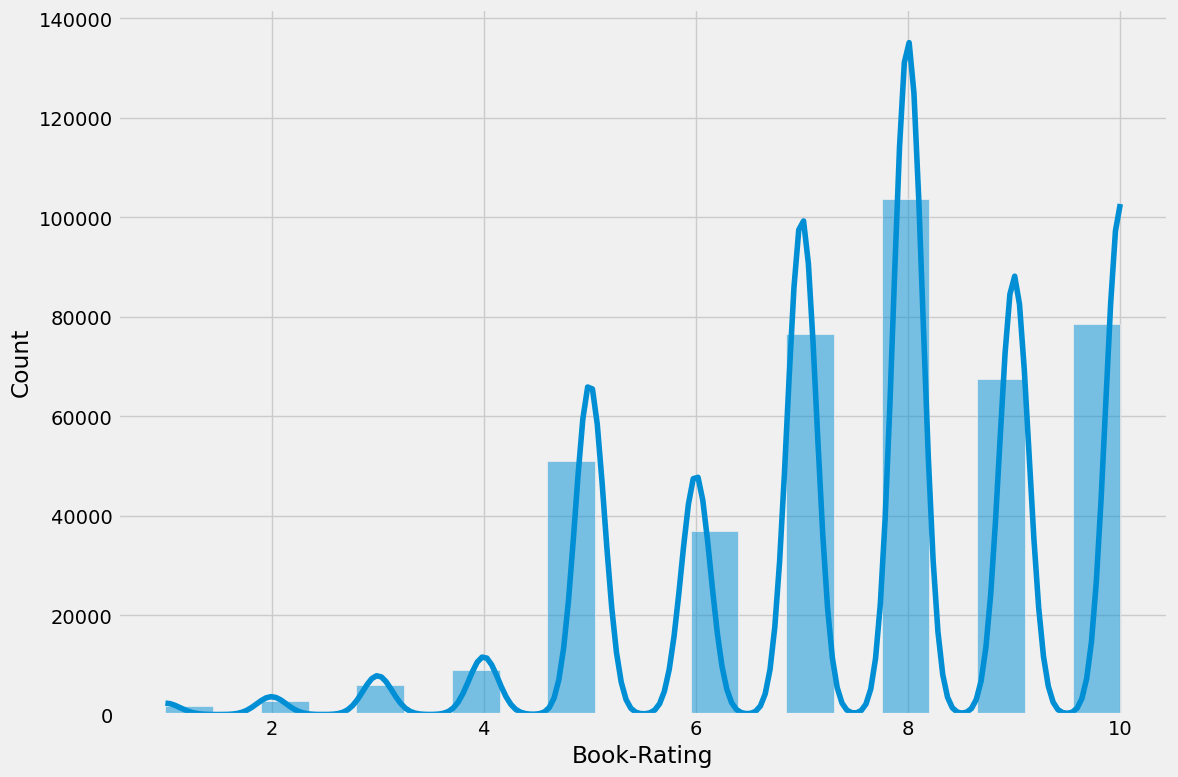

In [41]:
# Use a histogram to visualize the distribution of the variables. 
# This way, you can determine sensible categories for the price ranges. 
# You don't want to end up with too few observations in any one of the categories.
# The argument "kde" add a line that encompasses the distribution.

print(ratings_explicit.shape)
print(ratings_implicit.shape)
plt.style.use('fivethirtyeight')
plt.figure(figsize = (12, 8))
sns.histplot(data = ratings_explicit,  x = 'Book-Rating', bins = 20, kde = True,  palette = 'rocket_r')
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'book_ratings_er.png'))

#### The book ratings system in place vary and the most common one is the 5 stars rating system

1 STAR * => no place on a bookshelf
2 STARS ** => wasn't good but wasn't completely bad
3 STARS *** =>  neutral
4 STARS **** => enjoyed, from beginning to end
5 STARS ***** => creme de la creme of your bookshelf

#### We can categorise the 1-10 scale as following:

1 - Bad
2 - Not very good
3 - Slightly neutral
4 - Neutral
5 - Solid
6 - Notable
7 - Good
8 - Very good
9 - Superb
10 - Brilliant

### Creating categories for the ratings 1-10

For the purpose of this analysis, we are categorizing the ratings as following:

1 to 2 - Bad category
3 to 4 - Neutral category
5 to 6 - Middle category
7 to 8 - Good category
9 to 10 - Oustanding category

### Create a new 'Rating category' column

In [42]:
ratings_explicit.columns

Index(['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher',
       'User-ID', 'Book-Rating', 'Location', 'Age', 'City', 'Country',
       'Age Group'],
      dtype='object')

In [43]:
ratings_explicit.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,User-ID,Book-Rating,Location,Age,City,Country,Age Group
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,8.0,5.0,"timmins, ontario, canada",34,timmins,canada,19-35 years old
9,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,2002.0,Scribner,8.0,5.0,"timmins, ontario, canada",34,timmins,canada,19-35 years old
12,0887841740,The Middle Stories,Sheila Heti,2004.0,House of Anansi Press,8.0,5.0,"timmins, ontario, canada",34,timmins,canada,19-35 years old
13,1552041778,Jane Doe,R. J. Kaiser,1999.0,Mira Books,8.0,5.0,"timmins, ontario, canada",34,timmins,canada,19-35 years old
15,1567407781,The Witchfinder (Amos Walker Mystery Series),Loren D. Estleman,1998.0,Brilliance Audio - Trade,8.0,6.0,"timmins, ontario, canada",34,timmins,canada,19-35 years old


In [44]:
#### Create Ratings Groups

# Bad Category

ratings_explicit.loc[(ratings_explicit['Book-Rating'] >= 1) & (ratings_explicit['Book-Rating'] <= 2), 'Rating category'] = 'Bad category'

# Neutral category

ratings_explicit.loc[(ratings_explicit['Book-Rating'] >= 3) & (ratings_explicit['Book-Rating'] <= 4), 'Rating category'] = 'Neutral category'

# Middle category

ratings_explicit.loc[(ratings_explicit['Book-Rating'] >= 5) & (ratings_explicit['Book-Rating'] <= 6), 'Rating category'] = 'Middle category'

# Good category

ratings_explicit.loc[(ratings_explicit['Book-Rating'] >= 7) & (ratings_explicit['Book-Rating'] <= 8), 'Rating category'] = 'Good category'

# Oustanding category

ratings_explicit.loc[ratings_explicit['Book-Rating'] >= 9, 'Rating category'] = 'Oustanding category'

/var/folders/bx/5gbvgdk148552knvq9wj8vgm0000gn/T/ipykernel_10365/2310197359.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratings_explicit.loc[(ratings_explicit['Book-Rating'] >= 1) & (ratings_explicit['Book-Rating'] <= 2), 'Rating category'] = 'Bad category'


In [45]:
ratings_explicit['Rating category'].value_counts(dropna = False)

Rating category
Good category          180193
Oustanding category    146151
Middle category         87898
Neutral category        14900
Bad category             4529
Name: count, dtype: int64

In [46]:
ratings_explicit.columns

Index(['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher',
       'User-ID', 'Book-Rating', 'Location', 'Age', 'City', 'Country',
       'Age Group', 'Rating category'],
      dtype='object')

/Users/ladyarmanoid/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ladyarmanoid/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ladyarmanoid/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  self._figure.tight_layout(*args, **kwargs)
/Users/ladyarmanoid/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


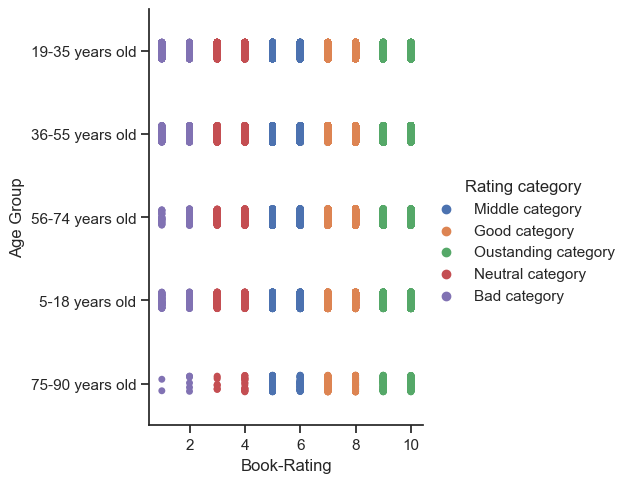

In [47]:
# Create a categorical plot in seaborn using the rating categories created above

sns.set(style = "ticks")
g = sns.catplot(x = "Book-Rating", y = "Age Group", hue = "Rating category", data = ratings_explicit)

# fig = g.get_figure()

g.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'category_rating_age_group_plot.png'))

### Renaming Countries:

In [48]:
print(sorted(ratings_explicit['Country'].unique())) # We are getting 291 distinct names for the countries

['', ' &#20013;&#22269;', ' \\"n/a\\""', ' \\n/a\\""', ' afghanistan', ' alachua', ' albania', ' alderney', ' algeria', ' america', ' andorra', ' angola', ' antarctica', ' antigua and barbuda', ' argentina', ' aroostook', ' aruba', ' australia', ' austria', ' austria"', ' autralia', ' az', ' azerbaijan', ' bahamas', ' bahrain', ' bangladesh', ' barbados', ' basilicata', ' belgium', ' belize', ' benin', ' berguedà', ' bermuda', ' bolivia', ' bosnia and herzegovina', ' brasil', ' brazil', ' brazil"', ' brunei', ' bulgaria', ' burma', ' c', ' c.a.', ' calabria', ' cambodia', ' camden', ' cameroon', ' canada', ' cananda', ' cape verde', ' caribbean sea', ' catalonia', ' catalunya', ' catalunya spain', ' cayman islands', ' channel islands', ' cherokee', ' chile', ' china', ' colombia', ' costa rica', ' costa rica"', ' croatia', ' croatia"', ' csa', ' cuba', ' cyprus', ' czech republic', ' denmark', ' denmark"', ' deutschland', ' disgruntled states of america', ' dominican republic', ' ecuad

In [49]:
# Custom function to correct country names and handle specific cases
def correct_country_name(country):
    # Lowercase the country for case-insensitive matching
    country_lower = country.lower()

    # Define patterns for specific countries
    au_patterns = [' australia', ' autralia']
    ag_patterns = [' antigua and barbuda']
    at_patterns = [' austria', ' austria"']
    az_patterns = [' az', ' azerbaijan']
    ba_patterns = [' bosnia and herzegovina']
    be_patterns = [' belgium', ' la belgique']
    br_patterns = [' brasil', ' brazil', ' brazil"']
    ca_patterns = [' canada', ' cananda']
    cn_patterns = [' china', ' la chine éternelle!', ' p.r.china']
    cr_patterns = [' costa rica', ' costa rica"']
    hr_patterns = [' croatia', ' croatia"']
    eu_patterns = [' europe']
    dk_patterns = [' denmark', ' denmark"']
    fi_patterns = [' finland', ' finland"']
    fr_patterns = [' france', ' france"', ' la france']
    de_patterns = [' deutschland', ' geermany', ' germany', ' germany"']
    gw_patterns = [' guinea-bissau']
    gr_patterns = [' greece', ' greece"']
    hu_patterns = [' hungary', ' hungary"']
    in_patterns = [' india', ' india"']
    ir_patterns = [' iran', ' iran"']
    ie_patterns = [' ireland', ' ireland"']
    il_patterns = [' israel', ' israel"']
    it_patterns = [' basilicata', ' calabria', ' ferrara', ' italia', ' italy', ' italy"', ' l`italia', ' lazio', ' lombardia']
    lu_patterns = [' luxembourg', ' luxembourg"']
    mm_patterns = [' burma']
    mx_patterns = [' mexico', ' mexico"']
    nl_patterns = [' nederlands', ' netherlands', ' netherlands"', ' the netherlands']
    nz_patterns = [' new zealand', ' new zealand"', ' nz']
    no_patterns = [' norway', ' norway"']
    pa_patterns = [' panama', ' republic of panama']
    ph_patterns = [' philippines', ' philippines"', ' phillipines']
    pt_patterns = [' portugal', ' portugal"']
    sh_patterns = [' st. helena']
    si_patterns = [' slovenia', ' slovenia"']
    es_patterns = [' berguedà', ' catalonia', ' catalunya', ' catalunya spain', ' espanha / galiza', ' espaã±a', ' españa', ' españa"', ' euskal herria', ' galiza', ' lleida', ' orense', ' spain', ' spain"']
    lk_patterns = [' sri lanka', ' sri lanka"']
    se_patterns = [' sweden', ' sweden"']
    ch_patterns = [' la suisse', ' switzerland', ' switzerland"']
    tr_patterns = [' turkey', ' turkey"']
    tt_patterns = [' tobago', ' trinidad and tobago']
    ua_patterns = [' ua', ' ukraine']
    ae_patterns = [' u.a.e', ' united arab emirates']
    uk_patterns = [' united kindgonm', ' alderney', ' camden', ' england', ' scotland', ' u.k.', ' united kingdom', ' united kingdom"', ' wales']
    us_patterns = [' alachua', ' america', ' aroostook', ' c.a.', ' cherokee', ' disgruntled states of america', ' fort bend', ' framingham', ' los estados unidos de norte america', ' maracopa', ' maricopa', ' ohio', ' orange co', ' richmond country', ' rutherford', ' saint loius', ' st.thomasi', ' u.s. of a.', ' u.s.a.', ' u.s.a>', ' u.s>', ' united sates', ' united staes', ' united state', ' united states', ' united states of america', ' us', ' usa', ' usa & canada', ' usa (currently living in england)', ' worcester', ' ysa']
    uv_patterns = [' u.s. virgin islands']
    uy_patterns = [' urugua', ' uruguay']
    yu_patterns = [' yugoslavia']

    # Define patterns for unknown countries
    unknown_patterns = [' &#20013;&#22269;', '', ' \\"n/a\\""', ' \\n/a\\""', ' c', ' caribbean sea', ' csa', ' everywhere and anywhere', ' far away...', ' here and there', ' k1c7b1', ' kern', ' lkjlj', ' morgan', ' n/a', ' n/a - on the road', ' pender', ' petrolwar nation', ' polk', ' quit', ' shelby', ' space', ' tdzimi', ' the world tomorrow', ' universe', ' van wert', ' x', '"', ' europe']
    
    # Dictionary of patterns
    patterns = {
        "Australia": au_patterns, "Antigua and Barbuda": ag_patterns, "Austria": at_patterns, "Azerbaijan": az_patterns, "Belgium": be_patterns,
        "Bosnia and Herzegovina": ba_patterns, "Brazil": br_patterns, "Canada": ca_patterns, "China": cn_patterns, "Costa Rica": cr_patterns,
        "Croatia": hr_patterns, "Denmark": dk_patterns, "Finland": fi_patterns, "France": fr_patterns,
        "Germany": de_patterns, "Guinea Bissau": gw_patterns, "Greece": gr_patterns, "Hungary": hu_patterns, "India": in_patterns,
        "Iran": ir_patterns, "Ireland": ie_patterns, "Israel": il_patterns, "Italy": it_patterns,
        "Luxembourg": lu_patterns, "Myanmar": mm_patterns, "Mexico": mx_patterns, "Netherlands": nl_patterns, "New Zealand": nz_patterns,
        "Norway": no_patterns, "Panama": pa_patterns, "Philippines": ph_patterns, "Portugal": pt_patterns,
        "Saint Helena": sh_patterns, "Slovenia": si_patterns, "Spain": es_patterns, "Sri Lanka": lk_patterns,
        "Sweden": se_patterns, "Switzerland": ch_patterns, "Turkey": tr_patterns, "Trinidad and Tobago": tt_patterns, "Ukraine": ua_patterns,
        "United Arab Emirates": ae_patterns, "United Kingdom": uk_patterns, "United States": us_patterns,
        "U.S. Virgin Islands": uv_patterns, "Uruguay": uy_patterns, "Serbia": yu_patterns, "Unknown": unknown_patterns
    }

    # Check if country matches any known pattern
    for country_name, pattern_list in patterns.items():
        if country_lower in pattern_list:
            return country_name

    # If the country does not match any known pattern, return it in title case
    return country.title()

# Apply the custom function to the 'Country' column
ratings_explicit['Country'] = ratings_explicit['Country'].apply(correct_country_name)

# Display the modified DataFrame
ratings_explicit

/var/folders/bx/5gbvgdk148552knvq9wj8vgm0000gn/T/ipykernel_10365/126364596.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratings_explicit['Country'] = ratings_explicit['Country'].apply(correct_country_name)


,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,User-ID,Book-Rating,Location,Age,City,Country,Age Group,Rating category
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,8.0,5.0,"timmins, ontario, canada",34,timmins,Canada,19-35 years old,Middle category
9,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,2002.0,Scribner,8.0,5.0,"timmins, ontario, canada",34,timmins,Canada,19-35 years old,Middle category
12,0887841740,The Middle Stories,Sheila Heti,2004.0,House of Anansi Press,8.0,5.0,"timmins, ontario, canada",34,timmins,Canada,19-35 years old,Middle category
13,1552041778,Jane Doe,R. J. Kaiser,1999.0,Mira Books,8.0,5.0,"timmins, ontario, canada",34,timmins,Canada,19-35 years old,Middle category
15,1567407781,The Witchfinder (Amos Walker Mystery Series),Loren D. Estleman,1998.0,Brilliance Audio - Trade,8.0,6.0,"timmins, ontario, canada",34,timmins,Canada,19-35 years old,Middle category
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1149775,8886661975,Unknown,Unknown,1996.0,Unknown,276448.0,10.0,"torre del greco, campania, italy",34,torre del greco,Italy,19-35 years old,Oustanding category
1149776,7222025634,Unknown,Unknown,1996.0,Unknown,276638.0,10.0,"shanghai, n/a, china",32,shanghai,China,19-35 years old,Oustanding category
1149777,0533233661,Unknown,Unknown,1996.0,Unknown,276663.0,5.0,"santiago de compostela, galicia, spain",20,santiago de compostela,Spain,19-35 years old,Middle category
1149778,3423120754,Unknown,Unknown,1996.0,Unknown,276668.0,8.0,"mülheim an der ruhr, nordrhein-westfalen, germany",34,mülheim an der ruhr,Germany,19-35 years old,Good category


In [50]:
# Check updated unique 'Country' values

print(sorted(ratings_explicit['Country'].unique()))

[' Afghanistan', ' Albania', ' Algeria', ' Andorra', ' Angola', ' Antarctica', ' Argentina', ' Aruba', ' Bahamas', ' Bahrain', ' Bangladesh', ' Barbados', ' Belize', ' Benin', ' Bermuda', ' Bolivia', ' Brunei', ' Bulgaria', ' Cambodia', ' Cameroon', ' Cape Verde', ' Cayman Islands', ' Channel Islands', ' Chile', ' Colombia', ' Cuba', ' Cyprus', ' Czech Republic', ' Dominican Republic', ' Ecuador', ' Egypt', ' El Salvador', ' Estonia', ' Fiji', ' Gabon', ' Ghana', ' Grenada', ' Guam', ' Guatemala', ' Guernsey', ' Guinea', ' Honduras', ' Hong Kong', ' Iceland', ' Indonesia', ' Jamaica', ' Japan', ' Jersey', ' Jordan', ' Kazakhstan', ' Kenya', ' Kosovo', ' Kuwait', ' Laos', ' Latvia', ' Lebanon', ' Libya', ' Lithuania', ' Macau', ' Macedonia', ' Madagascar', ' Malaysia', ' Malta', ' Mauritius', ' Moldova', ' Monaco', ' Mongolia', ' Morocco', ' Mozambique', ' Nepal', ' Netherlands Antilles', ' Nicaragua', ' Niger', ' Nigeria', ' Oman', ' Pakistan', ' Palau', ' Papua New Guinea', ' Paraguay

In [51]:
# Remove whitespaces

ratings_explicit['Country'] = ratings_explicit['Country'].str.lstrip()

# Check the output

print(sorted(ratings_explicit['Country'].unique()))

['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antarctica', 'Antigua and Barbuda', 'Argentina', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands', 'Channel Islands', 'Chile', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Denmark', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Gabon', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guam', 'Guatemala', 'Guernsey', 'Guinea', 'Guinea Bissau', 'Honduras', 'Hong Kong', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jersey', 'Jordan', 'Kazakhstan', 'Kenya', 'Kosovo', 'Kuwait', 'Laos', 'Latvia', 'Lebanon', 'Libya', 'Lithuania', 'Luxembourg', 'Macau', 'Macedonia', 'Madagascar', '

/var/folders/bx/5gbvgdk148552knvq9wj8vgm0000gn/T/ipykernel_10365/370543721.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratings_explicit['Country'] = ratings_explicit['Country'].str.lstrip()


### Creating a 'Continent' column:

In [52]:
ratings_explicit.loc[
    ratings_explicit['Country'].isin(['Antarctica']),
    'Continent'
] = 'Antarctica'

ratings_explicit.loc[
    ratings_explicit['Country'].isin(['Algeria', 'Angola', 'Benin', 'Cameroon', 'Cape Verde', \
                                      'Egypt', 'Gabon', 'Ghana', 'Guinea', 'Guinea Bissau', \
                                      'Kenya', 'Libya', 'Madagascar', 'Mauritius', 'Morocco', 'Mozambique', \
                                      'Niger', 'Nigeria', 'Saint Helena', 'South Africa', \
                                      'Tanzania', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe']),
    'Continent'
] = 'Africa'

ratings_explicit.loc[
    ratings_explicit['Country'].isin(['Afghanistan', 'Bahrain', 'Bangladesh', 'Brunei', 'Myanmar', 'Cambodia', \
                                      'China', 'Hong Kong', 'India', 'Indonesia', 'Iran', 'Israel', 'Japan', \
                                      'Jordan', 'Kuwait', 'Laos', 'Lebanon', 'Macau', 'Malaysia', 'Mongolia', \
                                      'Nepal', 'Oman', 'Pakistan', 'Philippines', 'Qatar', 'Russia', \
                                      'Saudi Arabia', 'Singapore', 'South Korea', 'Sri Lanka', 'Syria', 'Taiwan', \
                                      'Tajikistan', 'Thailand', 'Turkmenistan', 'United Arab Emirates', \
                                      'Uzbekistan', 'Vietnam', 'Yemen']),
    'Continent'
] = 'Asia'

ratings_explicit.loc[
    ratings_explicit['Country'].isin(['Albania', 'Andorra', 'Austria', 'Azerbaijan', 'Belgium', 'Bosnia and Herzegovina', \
                                      'Bulgaria', 'Channel Islands', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', \
                                      'Finland', 'France', 'Germany', 'Greece', 'Guernsey', 'Hungary', 'Iceland', 'Ireland', 'Italy', \
                                      'Jersey', 'Kazakhstan', 'Kosovo', 'Latvia', 'Lithuania', 'Luxembourg', 'Macedonia', 'Malta', 'Moldova', 'Monaco', \
                                      'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania', 'San Marino', 'Serbia', 'Slovakia', \
                                      'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'Ukraine', 'United Kingdom']),
    'Continent'
] = 'Europe'

ratings_explicit.loc[
    ratings_explicit['Country'].isin(['Antigua and Barbuda', 'Aruba', 'Bahamas', 'Barbados', 'Belize', 'Bermuda', 'Canada', 'Cayman Islands', \
                                      'Cuba', 'Costa Rica', 'Dominican Republic', 'El Salvador', 'Guatemala', 'Grenada', 'Honduras', 'Jamaica', \
                                      'Mexico', 'Netherlands Antilles', 'Nicaragua', 'Panama', 'Puerto Rico', 'Saint Lucia', \
                                      'Trinidad and Tobago', 'U.S. Virgin Islands', 'United States']),
    'Continent'
] = 'North America'

ratings_explicit.loc[
    ratings_explicit['Country'].isin(['Australia', 'Fiji', 'Guam', 'New Zealand','Palau', 'Papua New Guinea', \
                                      'Samoa', 'Tonga']),
    'Continent'
] = 'Oceania'

ratings_explicit.loc[
    ratings_explicit['Country'].isin(['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', \
                                      'Ecuador', 'Paraguay', 'Peru', 'Uruguay', 'Venezuela']),
    'Continent'
] = 'South America'

ratings_explicit.loc[
    ratings_explicit['Country'].isin(['Unknown']),
    'Continent'
] = 'Unknown'

/var/folders/bx/5gbvgdk148552knvq9wj8vgm0000gn/T/ipykernel_10365/1142705210.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratings_explicit.loc[


In [53]:
# Checking the new 'Continent' column

ratings_explicit['Continent'].value_counts(dropna = False)

Continent
North America    310585
Europe            81643
Unknown           20816
Oceania           12480
Asia               6594
South America      1224
Africa              277
Antarctica           52
Name: count, dtype: int64

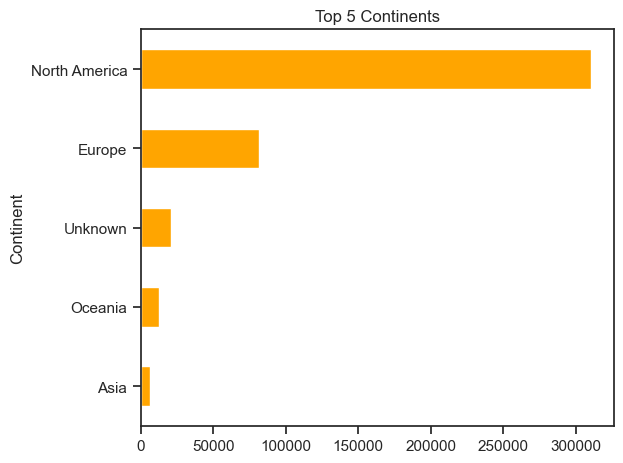

In [54]:
# Create a barchart for the continents from top to bottom

top_continent_barchart = ratings_explicit['Continent'].value_counts()[:5].sort_values(ascending = True).plot.barh(title = 'Top 5 Continents', ylabel='Continent', xlabel='', color ='orange')
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis/Visualizations/top_continent_barchart.png'))

# Show the graph

plt.show()

### 4. Questions and Answers

### *1. What geographical countries show the highest and lowest ratings?*

In [55]:
# Top 10 countries with higher ratings

country_count = pd.DataFrame(ratings_explicit.groupby(['Country'])['Book-Rating'].max())
top10countries_highratings = country_count.sort_values('Book-Rating', ascending = False).head(10)

In [56]:
top10countries_highratings

,Book-Rating
Country,
Thailand,10.0
Singapore,10.0
Slovenia,10.0
South Africa,10.0
South Korea,10.0
Japan,10.0
Spain,10.0
Italy,10.0
Israel,10.0


In [57]:
# Top 10 countries with average ratings

country1_count = pd.DataFrame(ratings_explicit.groupby(['Country'])['Book-Rating'].mean())
top10countries_avgratings = country1_count.sort_values('Book-Rating', ascending = False).head(10)

In [58]:
top10countries_avgratings

,Book-Rating
Country,
Bosnia and Herzegovina,10.000000
Mongolia,10.000000
Bangladesh,9.500000
Romania,9.048193
U.S. Virgin Islands,9.000000
Mauritius,9.000000
Kosovo,9.000000
Yemen,9.000000
Antigua and Barbuda,9.000000


In [59]:
# Group by 'Continent' and 'Age Group'

continent_age_group = ratings_explicit.groupby(['Continent', 'Age Group']).size().unstack()

continent_age_group = continent_age_group.loc[continent_age_group.sum(axis = 1).sort_values(ascending = True).index]

# Check output

continent_age_group

Age Group,19-35 years old,36-55 years old,5-18 years old,56-74 years old,75-90 years old
Continent,,,,,
Antarctica,52.0,NaN,NaN,NaN,NaN
Africa,154.0,68.0,43.0,12.0,NaN
South America,683.0,384.0,84.0,72.0,1.0
Asia,4677.0,931.0,958.0,27.0,1.0
Oceania,8702.0,2404.0,570.0,777.0,27.0
Unknown,17734.0,2102.0,180.0,706.0,94.0
Europe,56154.0,19050.0,2600.0,3819.0,20.0
North America,189066.0,93953.0,10854.0,15941.0,771.0


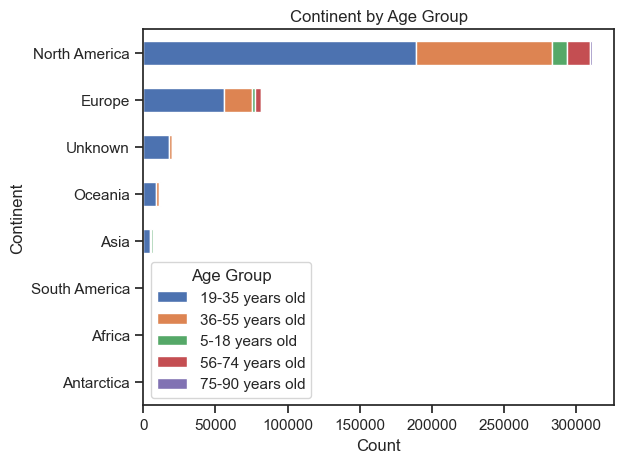

In [60]:
# Create bar chart for 'continent_age_group'

continent_age_group_bar = continent_age_group.plot.barh(stacked = True)

# Title and labels

plt.title('Continent by Age Group')
plt.xlabel('Count')
plt.ylabel('Continent')
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis/Visualizations/continent_age_group_bar.png'))

# Show the graph

plt.show()

In [61]:
# Group 'Age Group' with High 'Book Rating' into a dataframe

top10countries_highratings = ratings_explicit[['Country', 'Book-Rating']].sort_values('Book-Rating', ascending = False).head(10)

# Check Output

top10countries_highratings.head(10)

,Country,Book-Rating
973377,Austria,10.0
706754,United States,10.0
706778,United States,10.0
337364,United States,10.0
706776,United States,10.0
337354,United Kingdom,10.0
844916,United States,10.0
337350,Canada,10.0
844917,United States,10.0
337348,Canada,10.0


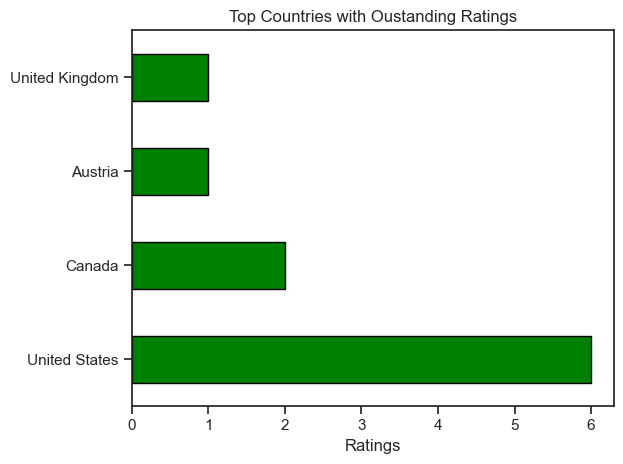

In [62]:
# Creating a bar graph for countries with high ratings

countries_highratings = top10countries_highratings['Country'].value_counts().plot.barh(color = 'green', edgecolor = 'black')

# Title and labels

plt.title('Top Countries with Oustanding Ratings')
plt.xlabel('Ratings')
plt.ylabel('')
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis/Visualizations/countries_highratings.png'))

# Show the graph

plt.show()

In [63]:
# Group 'Age Group' with Average 'Book Rating' into a dataframe

top10countries_avgratings = country1_count.sort_values('Book-Rating', ascending = False).head(10)

# Check Output

top10countries_avgratings.head(10)

,Book-Rating
Country,
Bosnia and Herzegovina,10.000000
Mongolia,10.000000
Bangladesh,9.500000
Romania,9.048193
U.S. Virgin Islands,9.000000
Mauritius,9.000000
Kosovo,9.000000
Yemen,9.000000
Antigua and Barbuda,9.000000


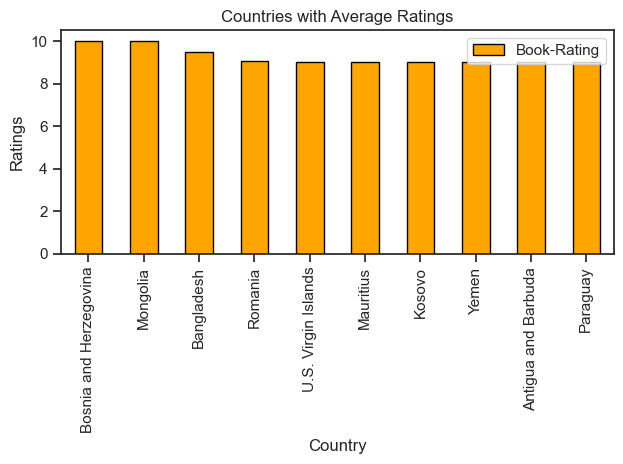

In [64]:
# Creating a bar graph for countries with average ratings

countries_avgratings = top10countries_avgratings.plot.bar(color = 'orange', edgecolor = 'black')

# Title and labels

plt.title('Countries with Average Ratings')
plt.xlabel('Country')
plt.ylabel('Ratings')
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis/Visualizations/countries_avgratings.png'))

# Show the graph

plt.show()

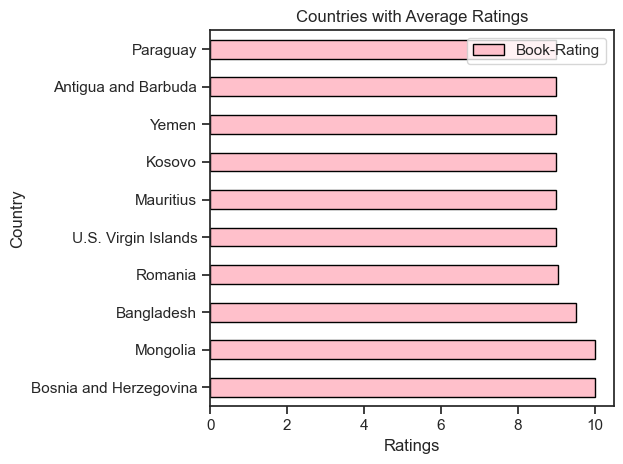

In [65]:
# Creating a bar graph for countries with average ratings

countries_avgratings = top10countries_avgratings.plot.barh(color = 'pink', edgecolor = 'black')

# Title and labels

plt.title('Countries with Average Ratings')
plt.xlabel('Ratings')
plt.ylabel('Country')
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis/Visualizations/countries_avgratings.png'))

# Show the graph

plt.show()

In [66]:
# Bottom 10 countries with lower ratings

country2_count = pd.DataFrame(ratings_explicit.groupby(['Country'])['Book-Rating'].min())
bottom10countries_lowratings = country2_count.sort_values('Book-Rating', ascending = True).head(10)

In [67]:
bottom10countries_lowratings

,Book-Rating
Country,
Afghanistan,1.0
Canada,1.0
Portugal,1.0
Sri Lanka,1.0
Spain,1.0
China,1.0
Croatia,1.0
Philippines,1.0
Japan,1.0


In [68]:
# Group 'Age Group' with High 'Book Rating' into a dataframe

bottom10countries_lowratings = bottom10countries_lowratings.sort_values('Book-Rating', ascending = False).head(10)

# Check Output

bottom10countries_lowratings.head(10)

,Book-Rating
Country,
Afghanistan,1.0
Canada,1.0
Portugal,1.0
Sri Lanka,1.0
Spain,1.0
China,1.0
Croatia,1.0
Philippines,1.0
Japan,1.0


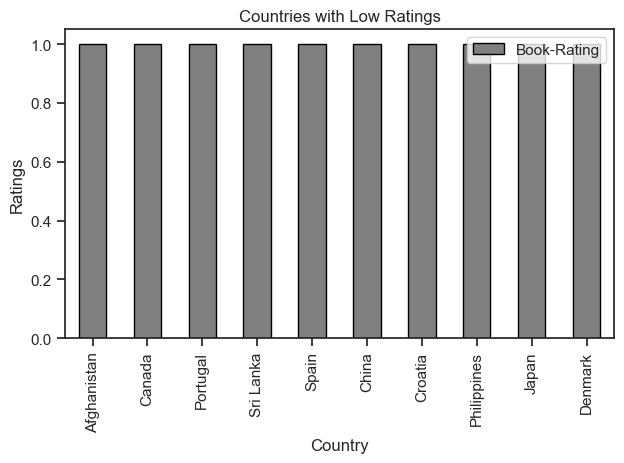

In [69]:
# Creating a bar graph for countries with bottom ratings

countries_lowratings = bottom10countries_lowratings.plot.bar(color = 'grey', edgecolor = 'black')

# Title and labels

plt.title('Countries with Low Ratings')
plt.xlabel('Country')
plt.ylabel('Ratings')
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis/Visualizations/countries_avgratings.png'))

# Show the graph

plt.show()

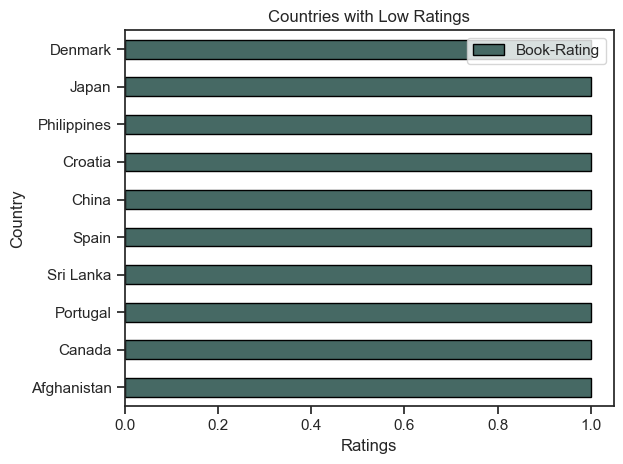

In [70]:
# Creating a bar graph for countries with bottom ratings

countries_lowratings = bottom10countries_lowratings.plot.barh(color = '#466964', edgecolor = 'black')

# Title and labels

plt.title('Countries with Low Ratings')
plt.xlabel('Ratings')
plt.ylabel('Country')
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis/Visualizations/countries_avgratings.png'))

# Show the graph

plt.show()

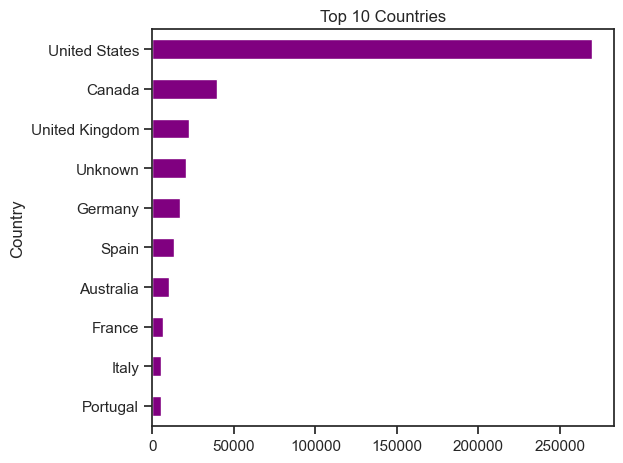

In [71]:
# Create a barchart for top 10 countries

top_countries_barchart = ratings_explicit['Country'].value_counts()[:10].sort_values(ascending = True).plot.barh(title = 'Top 10 Countries', ylabel='Country', xlabel='', color ='purple')
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis/Visualizations/top_countries_barchart.png'))

# Show the graph

plt.show()

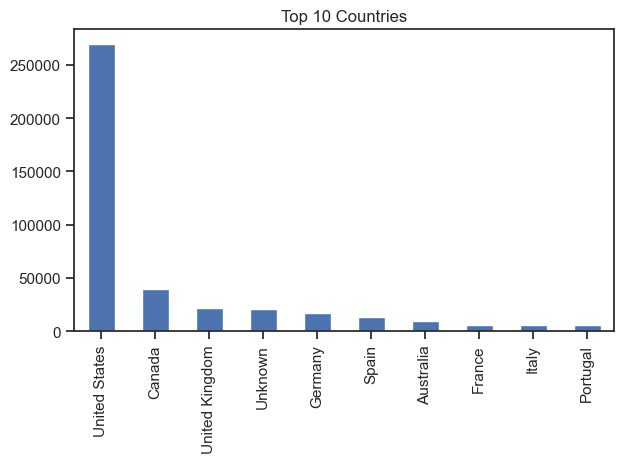

In [72]:
# Create a vertical barchart for top 10 countries

top_countries_vbarchart = ratings_explicit['Country'].value_counts()[:10].sort_values(ascending = False).plot.bar(title = 'Top 10 Countries', ylabel='', xlabel='')
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis/Visualizations/top_countries_vbarchart.png'))

# Show the graph

plt.show()

### *Answers for Question 1*:

- The countries with the highest ratings are the US, Canada, Austria and the UK
- The countries with the lowest ratings are mainly in Europe (i.e. with Spain and Switzerland) and Asia (i.e. with Japan and China)
- We can see above that the top 10 countries where the users are based are the US, Canada, the UK, Unknown countries, Germany, Spain, Australia, France, Italy and Portugal
- With the bar chart 'Continent by Age Group', we can also clearly see which part of the world represent the users 

### 2. Are there any notable patterns in reading levels based on location?

### *Answers for Question 2*:

- Solely based on the sum of book ratings per country, we can list the US, Canada and the UK as our top 3
- On a continent level, North America dominates followed by Europe, with the highest age group being between 19 and 35 years old

### 3. Which books are most popular books among users in the dataset?

In [73]:
# Top 10 book titles and ratings

titles_count = pd.DataFrame(ratings_explicit.groupby(['bookTitle'])['Book-Rating'].sum())
top10titles = titles_count.sort_values('Book-Rating', ascending = False).head(11)

In [74]:
top10titles # The novel 'The Lovely Bones' is the winner, achieving the highest amount or ratings throughout time

,Book-Rating
bookTitle,
Unknown,368914.0
The Lovely Bones: A Novel,5787.0
The Da Vinci Code,4169.0
The Secret Life of Bees,3442.0
The Red Tent (Bestselling Backlist),3134.0
The Nanny Diaries: A Novel,2923.0
Harry Potter and the Chamber of Secrets (Book 2),2882.0
Bridget Jones's Diary,2875.0
Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback)),2815.0


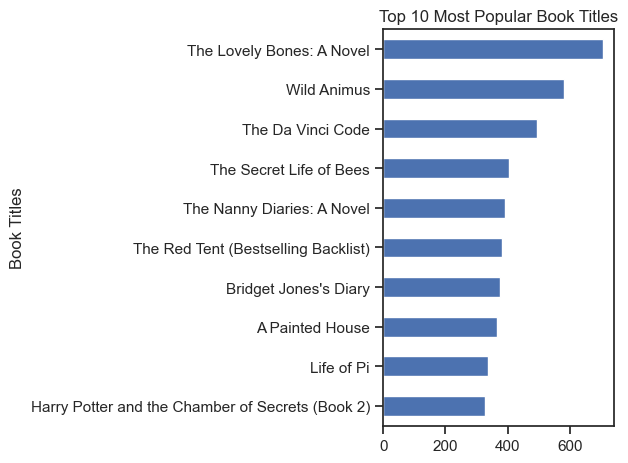

In [75]:
# Create a barchart for top 10 most popular book titles for users

popular_titles_barchart = ratings_explicit['bookTitle'].value_counts()[1:11].sort_values(ascending = True).plot.barh(title = 'Top 10 Most Popular Book Titles', ylabel='Book Titles', xlabel='')
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis/Visualizations/popular_titles_barchart.png'))

# Show the graph

plt.show()

In [76]:
# Top average 10 book titles and ratings

titles_avg = pd.DataFrame(ratings_explicit.groupby(['bookTitle'])['Book-Rating'].mean())
avg10titles = titles_avg.sort_values('Book-Rating', ascending = False).head(10)

In [77]:
avg10titles  # The guide 'Passport's Guide to the Best of Scotland' is in the first position for average rating titles

,Book-Rating
bookTitle,
Passport's Guide to the Best of Scotland,10.0
Goofy Takes Off Switzerland Adventure,10.0
Passion: Photography from the Movie the Passion of the Christ,10.0
The Small Wood Shop (The Best of Fine Woodworking),10.0
The Smiling Pets Recipe Book: 101 Easy Make Treats..Five Minutes or Less Prep Time,10.0
Spells For Self-Improvement,10.0
Dancing in Cadillac Light,10.0
Goofy Joins the Circus,10.0
Goofy On Safari Kenya Adventure,10.0


In [78]:
# Lowest 10 book titles and ratings

titles_low = pd.DataFrame(ratings_explicit.groupby(['bookTitle'])['Book-Rating'].min())
avg10titles = titles_low.sort_values('Book-Rating', ascending = False).head(10)

In [79]:
titles_low.head(10)

,Book-Rating
bookTitle,
"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",9.0
"Ask Lily (Young Women of Faith: Lily Series, Book 5)",8.0
Dark Justice,10.0
"Earth Prayers From around the World: 365 Prayers, Poems, and Invocations for Honoring the Earth",1.0
Final Fantasy Anthology: Official Strategy Guide (Brady Games),10.0
Flight of Fancy: American Heiresses (Zebra Ballad Romance),8.0
Garfield Bigger and Better (Garfield (Numbered Paperback)),7.0
God's Little Promise Book,9.0
"Good Wives: Image and Reality in the Lives of Women in Northern New England, 1650-1750",7.0


In [80]:
ratings_explicit['Book-Rating'].describe()

count    433671.000000
mean          7.601066
std           1.843798
min           1.000000
25%           7.000000
50%           8.000000
75%           9.000000
max          10.000000
Name: Book-Rating, dtype: float64

In [81]:
# Top 10 book authors and ratings

ratings_count = pd.DataFrame(ratings_explicit.groupby(['bookAuthor'])['Book-Rating'].sum())
top10authors = ratings_count.sort_values('Book-Rating', ascending = False).head(11)

In [82]:
top10authors  # Top 3 authors: Stephen King, followed by Nora Roberts and Josh Grisham are the most-read books

,Book-Rating
bookAuthor,
Unknown,369055.0
Stephen King,36254.0
Nora Roberts,22416.0
John Grisham,19184.0
James Patterson,18375.0
J. K. Rowling,15662.0
Mary Higgins Clark,12583.0
Janet Evanovich,11838.0
Dean R. Koontz,11169.0


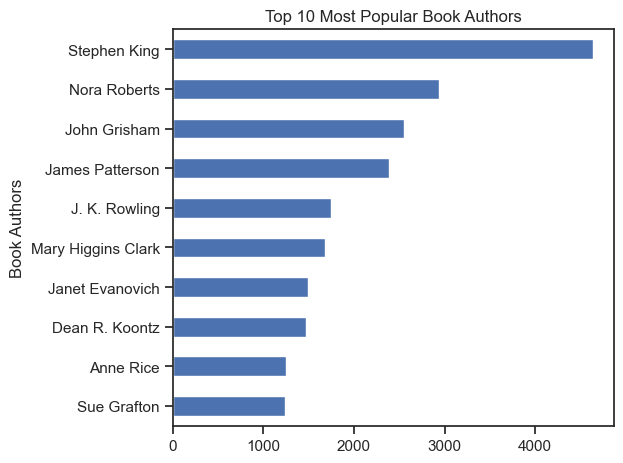

In [83]:
# Create a barchart for top 10 most popular book authors for users

popular_authors_barchart = ratings_explicit['bookAuthor'].value_counts()[1:11].sort_values(ascending = True).plot.barh(title = 'Top 10 Most Popular Book Authors', ylabel='Book Authors', xlabel='')
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis/Visualizations/popular_authors_barchart.png'))

# Show the graph

plt.show()

In [84]:
# Bottom 10 book authors and ratings

ratings2_count = pd.DataFrame(ratings_explicit.groupby(['bookAuthor'])['Book-Rating'].min())
bottom10authors = ratings2_count.sort_values('Book-Rating', ascending = True).head(10)

In [85]:
bottom10authors # Bottom 3 authors: Gary Hauptman, D. Miller and D. Moore

,Book-Rating
bookAuthor,
Gaby Hauptmann,1.0
D. Miller,1.0
D. Moore,1.0
Karen Kreider,1.0
Morag Prunty,1.0
Stephen Laws,1.0
Barbara Johnson,1.0
Dennis Lehane,1.0
Gregory Maguire,1.0


In [86]:
# Top 10 book authors and ratings by country

ratings3_count = pd.DataFrame(ratings_explicit.groupby(['bookAuthor','Country'])['Book-Rating'].sum())
top10authors_countries = ratings3_count.sort_values('Book-Rating', ascending = False).head(10)

top10authors_countries

Book-Rating
bookAuthor   Country                    
Unknown      United Kingdom      55414.0
             United States       55397.0
             Spain               40737.0
             Germany             33291.0
             Canada              32056.0
             Italy               29104.0
Stephen King United States       26169.0
Unknown      Unknown             22225.0
             Australia           21359.0
Nora Roberts United States       18492.0

In [87]:
# Bottom 10 book authors and ratings by country

ratings4_count = pd.DataFrame(ratings_explicit.groupby(['bookAuthor','Country'])['Book-Rating'].min())
bottom10authors_countries = ratings4_count.sort_values('Book-Rating', ascending = True).head(10)

bottom10authors_countries

,,Book-Rating
bookAuthor,Country,
Odell,United States,1.0
Colin Forbes,Germany,1.0
Barbara Johnson,United States,1.0
JILL CONNER BROWNE,United States,1.0
Diana Palmer,United States,1.0
Annette Tison,Italy,1.0
Philip Larkin,United States,1.0
Philip Lee Ralph,United States,1.0
Philip Lefton,United States,1.0


### *4. Can we identify trends in the popularity of specific authors or titles over time?*

In [88]:
# Top 50 book authors and ratings

ratings_count = pd.DataFrame(ratings_explicit.groupby(['bookAuthor'])['Book-Rating'].sum())
top25authors = ratings_count.sort_values('Book-Rating', ascending = False).head(25)

In [89]:
top25authors  # Top 25 authors all time

,Book-Rating
bookAuthor,
Unknown,369055.0
Stephen King,36254.0
Nora Roberts,22416.0
John Grisham,19184.0
James Patterson,18375.0
J. K. Rowling,15662.0
Mary Higgins Clark,12583.0
Janet Evanovich,11838.0
Dean R. Koontz,11169.0


In [90]:
ratings_explicit['yearOfPublication'].describe()

count    433671.000000
mean       1995.712875
std           6.946723
min        1376.000000
25%        1994.000000
50%        1996.000000
75%        2001.000000
max        2006.000000
Name: yearOfPublication, dtype: float64

In [91]:
#### Define Year Ranges

def year_label(row):
  if row['yearOfPublication'] <= 1376:
    return '1376'
  elif (row['yearOfPublication'] >= 1377) and (row['yearOfPublication'] <= 1477):
    return '1377-1477'
  elif (row['yearOfPublication'] >= 1478) and (row['yearOfPublication'] <= 1577):
    return '1478-1577'
  elif (row['yearOfPublication'] >= 1578) and (row['yearOfPublication'] <= 1677):
    return '1578-1677'
  elif (row['yearOfPublication'] >= 1678) and (row['yearOfPublication'] <= 1777):
    return '1678-1777'
  elif (row['yearOfPublication'] >= 1778) and (row['yearOfPublication'] <= 1877):
    return '1778-1877'
  elif (row['yearOfPublication'] >= 1878) and (row['yearOfPublication'] <= 1977):
    return '1878-1977'
  elif (row['yearOfPublication'] >= 1978) and (row['yearOfPublication'] <= 1987):
    return '1978-1987'
  elif (row['yearOfPublication'] >= 1988) and (row['yearOfPublication'] <= 1997):
    return '1988-1997'
  elif (row['yearOfPublication'] >= 1998) and (row['yearOfPublication'] <= 2006):
    return '1998-2006'
  else: return 'Not available'


# Check the output

ratings_explicit['yearRange'] = ratings_explicit.apply(year_label, axis = 1)

/var/folders/bx/5gbvgdk148552knvq9wj8vgm0000gn/T/ipykernel_10365/3863550229.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratings_explicit['yearRange'] = ratings_explicit.apply(year_label, axis = 1)


In [92]:
# Check the new category


ratings_explicit['yearRange'].value_counts(dropna = False)

yearRange
1988-1997    197259
1998-2006    191677
1978-1987     35241
1878-1977      9491
1778-1877         1
1377-1477         1
1376              1
Name: count, dtype: int64

In [93]:
# Create 'authors_year_range'

authors_year_range = ratings_explicit.loc[ratings_explicit['bookAuthor'].isin(['yearRange'])]

# Check output

authors_year_range.shape

(0, 15)

In [94]:
ratings_explicit.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,User-ID,Book-Rating,Location,Age,City,Country,Age Group,Rating category,Continent,yearRange
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,8.0,5.0,"timmins, ontario, canada",34,timmins,Canada,19-35 years old,Middle category,North America,1998-2006
9,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,2002.0,Scribner,8.0,5.0,"timmins, ontario, canada",34,timmins,Canada,19-35 years old,Middle category,North America,1998-2006
12,0887841740,The Middle Stories,Sheila Heti,2004.0,House of Anansi Press,8.0,5.0,"timmins, ontario, canada",34,timmins,Canada,19-35 years old,Middle category,North America,1998-2006
13,1552041778,Jane Doe,R. J. Kaiser,1999.0,Mira Books,8.0,5.0,"timmins, ontario, canada",34,timmins,Canada,19-35 years old,Middle category,North America,1998-2006
15,1567407781,The Witchfinder (Amos Walker Mystery Series),Loren D. Estleman,1998.0,Brilliance Audio - Trade,8.0,6.0,"timmins, ontario, canada",34,timmins,Canada,19-35 years old,Middle category,North America,1998-2006


In [95]:
ratings_explicit.tail()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,User-ID,Book-Rating,Location,Age,City,Country,Age Group,Rating category,Continent,yearRange
1149775,8886661975,Unknown,Unknown,1996.0,Unknown,276448.0,10.0,"torre del greco, campania, italy",34,torre del greco,Italy,19-35 years old,Oustanding category,Europe,1988-1997
1149776,7222025634,Unknown,Unknown,1996.0,Unknown,276638.0,10.0,"shanghai, n/a, china",32,shanghai,China,19-35 years old,Oustanding category,Asia,1988-1997
1149777,0533233661,Unknown,Unknown,1996.0,Unknown,276663.0,5.0,"santiago de compostela, galicia, spain",20,santiago de compostela,Spain,19-35 years old,Middle category,Europe,1988-1997
1149778,3423120754,Unknown,Unknown,1996.0,Unknown,276668.0,8.0,"mülheim an der ruhr, nordrhein-westfalen, germany",34,mülheim an der ruhr,Germany,19-35 years old,Good category,Europe,1988-1997
1149779,05162443314,Unknown,Unknown,1996.0,Unknown,276723.0,8.0,"san antonio, texas, usa",12,san antonio,United States,5-18 years old,Good category,North America,1988-1997


In [96]:
# Top 100 book authors with ratings and ISBN by country

ratings4_count = pd.DataFrame(ratings_explicit.groupby(['ISBN','bookAuthor','Country'])['Book-Rating'].sum())
top100authors_ISBN_countries = ratings4_count.sort_values('Book-Rating', ascending = False).head(100)

top100authors_ISBN_countries

,,,Book-Rating
ISBN,bookAuthor,Country,
0316666343,Alice Sebold,United States,4356.0
0385504209,Dan Brown,United States,3327.0
0312195516,Anita Diamant,United States,2473.0
059035342X,J. K. Rowling,United States,2410.0
0679781587,Unknown,United States,2346.0
...,...,...,...
0440220602,John Grisham,United States,766.0
0446606812,Nicholas Sparks,United States,763.0
0452282829,Joyce Carol Oates,United States,761.0


In [97]:
# Top 50 book authors with ratings ISBN and yearRange by country

ratings5_count = pd.DataFrame(ratings_explicit.groupby(['yearRange','ISBN','bookAuthor','Country'])['Book-Rating'].sum())
top50authors_ISBN_yearRange = ratings5_count.sort_values('Book-Rating', ascending = False).head(50)

top50authors_ISBN_yearRange

Book-Rating
yearRange ISBN       bookAuthor             Country                   
1998-2006 0316666343 Alice Sebold           United States       4356.0
          0385504209 Dan Brown              United States       3327.0
          0312195516 Anita Diamant          United States       2473.0
          059035342X J. K. Rowling          United States       2410.0
1988-1997 0679781587 Unknown                United States       2346.0
1998-2006 0142001740 Sue Monk Kidd          United States       2296.0
1988-1997 0060928336 Rebecca Wells          United States       2120.0
1998-2006 0446672211 Billie Letts           United States       1847.0
          0671027360 Dan Brown              United States       1831.0
          044023722X John Grisham           United States       1758.0
          0452282152 Tracy Chevalier        United States       1719.0
          0786868716 Mitch Albom            United States       1715.0
          0743418174 Jennifer Weiner        United States       1676.0
          0316601950 Anita Shreve           United States       1612.0
1988-1997 067976402X David Guterson         United States       1516.0
1998-2006 043935806X J. K. Rowling          United States       1486.0
          0060930535 Barbara Kingsolver     United States       1467.0
          0312278586 Emma McLaughlin        United States       1454.0
1988-1997 0316769487 J.D. Salinger          United States       1452.0
1998-2006 0439064872 J. K. Rowling          United States       1441.0
1988-1997 0385484518 MITCH ALBOM            United States       1393.0
          0446310786 Harper Lee             United States       1390.0
1998-2006 0375727345 Andre Dubus III        United States       1357.0
1988-1997 0345337662 Anne Rice              United States       1321.0
1998-2006 0971880107 Rich Shapero           United States       1301.0
          0345417623 MICHAEL CRICHTON       United States       1294.0
          0156027321 Yann Martel            United States       1288.0
1978-1987 0345342968 RAY BRADBURY           United States       1274.0
1998-2006 0446605239 Nicholas Sparks        United States       1274.0
1988-1997 044021145X John Grisham           United States       1266.0
          0671003755 Wally Lamb             United States       1243.0
1998-2006 0440226430 Judy Blume             United States       1242.0
1978-1987 0345339681 J.R.R. TOLKIEN         United States       1233.0
1988-1997 0440211727 JOHN GRISHAM           United States       1210.0
1998-2006 0345370775 Michael Crichton       United States       1202.0
          0671021001 Wally Lamb             United States       1197.0
1988-1997 0060976845 Rebecca Wells          United States       1179.0
1998-2006 0440234743 John Grisham           United States       1149.0
          0446610038 James Patterson        United States       1114.0
          0439139597 J. K. Rowling          United States       1111.0
          0316284955 Janet Fitch            United States       1109.0
1988-1997 0804106304 Amy Tan                United States       1100.0
1998-2006 1400034779 Alexander McCall Smith United States       1098.0
1988-1997 0842329129 Tim Lahaye             United States       1086.0
1998-2006 0060934417 Ann Patchett           United States       1077.0
1988-1997 0345361792 John Irving            United States       1071.0
1998-2006 0439136350 J. K. Rowling          United States       1047.0
          0316776963 David Sedaris          United States       1026.0
          0439136369 J. K. Rowling          United States       1015.0
          0440241073 John Grisham           United States       1014.0

In [98]:
# Top 100 book authors with ratings and ISBN by continent

ratings6_count = pd.DataFrame(ratings_explicit.groupby(['ISBN','bookAuthor','Continent'])['Book-Rating'].sum())
top100authors_ISBN_continent = ratings6_count.sort_values('Book-Rating', ascending = False).head(100)

top100authors_ISBN_continent

,,,Book-Rating
ISBN,bookAuthor,Continent,
0316666343,Alice Sebold,North America,4881.0
0385504209,Dan Brown,North America,3505.0
0312195516,Anita Diamant,North America,2821.0
0679781587,Unknown,North America,2540.0
059035342X,J. K. Rowling,North America,2465.0
...,...,...,...
014028009X,Helen Fielding,North America,880.0
0446606812,Nicholas Sparks,North America,862.0
0142000205,Gwyn Hyman Rubio,North America,857.0


In [99]:
# Top 50 book authors with ratings ISBN and yearRange by continent

ratings7_count = pd.DataFrame(ratings_explicit.groupby(['yearRange','ISBN','bookAuthor','Continent'])['Book-Rating'].sum())
top50authors_ISBN_yearRange_continent = ratings7_count.sort_values('Book-Rating', ascending = False).head(50)

top50authors_ISBN_yearRange_continent

Book-Rating
yearRange ISBN       bookAuthor             Continent                 
1998-2006 0316666343 Alice Sebold           North America       4881.0
          0385504209 Dan Brown              North America       3505.0
          0312195516 Anita Diamant          North America       2821.0
1988-1997 0679781587 Unknown                North America       2540.0
1998-2006 059035342X J. K. Rowling          North America       2465.0
          0142001740 Sue Monk Kidd          North America       2441.0
1988-1997 0060928336 Rebecca Wells          North America       2321.0
1998-2006 0446672211 Billie Letts           North America       2124.0
          0671027360 Dan Brown              North America       1959.0
          044023722X John Grisham           North America       1883.0
          0786868716 Mitch Albom            North America       1840.0
          0452282152 Tracy Chevalier        North America       1833.0
          0316601950 Anita Shreve           North America       1828.0
1988-1997 067976402X David Guterson         North America       1810.0
1998-2006 0743418174 Jennifer Weiner        North America       1725.0
1988-1997 0316769487 J.D. Salinger          North America       1645.0
1998-2006 0060930535 Barbara Kingsolver     North America       1628.0
          0375727345 Andre Dubus III        North America       1576.0
1988-1997 0446310786 Harper Lee             North America       1576.0
          0345337662 Anne Rice              North America       1565.0
1998-2006 043935806X J. K. Rowling          North America       1544.0
          0971880107 Rich Shapero           North America       1530.0
          0671021001 Wally Lamb             North America       1529.0
1988-1997 0385484518 MITCH ALBOM            North America       1522.0
1998-2006 0312278586 Emma McLaughlin        North America       1503.0
          0439064872 J. K. Rowling          North America       1476.0
1988-1997 044021145X John Grisham           North America       1455.0
          0671003755 Wally Lamb             North America       1434.0
          0804106304 Amy Tan                North America       1419.0
1998-2006 0446605239 Nicholas Sparks        North America       1418.0
1988-1997 0440211727 JOHN GRISHAM           North America       1413.0
1998-2006 0345370775 Michael Crichton       North America       1393.0
          0440226430 Judy Blume             North America       1361.0
          0345417623 MICHAEL CRICHTON       North America       1359.0
          0156027321 Yann Martel            North America       1354.0
1978-1987 0345342968 RAY BRADBURY           North America       1343.0
1998-2006 0440241073 John Grisham           North America       1315.0
1988-1997 0345361792 John Irving            North America       1289.0
1978-1987 0345339681 J.R.R. TOLKIEN         North America       1278.0
1988-1997 0060976845 Rebecca Wells          North America       1260.0
1998-2006 0446610038 James Patterson        North America       1250.0
          1400034779 Alexander McCall Smith North America       1208.0
1988-1997 0440214041 John Grisham           North America       1207.0
1998-2006 0316284955 Janet Fitch            North America       1207.0
          0440234743 John Grisham           North America       1172.0
          0060938455 Eric Schlosser         North America       1163.0
          0060934417 Ann Patchett           North America       1145.0
          0439139597 J. K. Rowling          North America       1134.0
          0060502258 Rebecca Wells          North America       1134.0
          0440206154 Thomas Harris          North America       1117.0

In [100]:
# Top 100 book titles with ratings and ISBN by country

titles_count = pd.DataFrame(ratings_explicit.groupby(['ISBN','bookTitle','Country'])['Book-Rating'].sum())
top100titles_ISBN_countries = titles_count.sort_values('Book-Rating', ascending = False).head(100)

top100titles_ISBN_countries

,,,Book-Rating
ISBN,bookTitle,Country,
0316666343,The Lovely Bones: A Novel,United States,4356.0
0385504209,The Da Vinci Code,United States,3327.0
0312195516,The Red Tent (Bestselling Backlist),United States,2473.0
059035342X,Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback)),United States,2410.0
0679781587,Unknown,United States,2346.0
...,...,...,...
0440220602,The Chamber,United States,766.0
0446606812,Message in a Bottle,United States,763.0
0452282829,We Were the Mulvaneys,United States,761.0


In [101]:
# Top 50 book titles with ratings ISBN and yearRange by country

titles2_count = pd.DataFrame(ratings_explicit.groupby(['yearRange','ISBN','bookTitle','Country'])['Book-Rating'].sum())
top50titles_ISBN_yearRange = titles2_count.sort_values('Book-Rating', ascending = False).head(50)

top50titles_ISBN_yearRange

Book-Rating
yearRange ISBN       bookTitle                                          Country                   
1998-2006 0316666343 The Lovely Bones: A Novel                          United States       4356.0
          0385504209 The Da Vinci Code                                  United States       3327.0
          0312195516 The Red Tent (Bestselling Backlist)                United States       2473.0
          059035342X Harry Potter and the Sorcerer's Stone (Harry Po... United States       2410.0
1988-1997 0679781587 Unknown                                            United States       2346.0
1998-2006 0142001740 The Secret Life of Bees                            United States       2296.0
1988-1997 0060928336 Divine Secrets of the Ya-Ya Sisterhood: A Novel    United States       2120.0
1998-2006 0446672211 Where the Heart Is (Oprah's Book Club (Paperback)) United States       1847.0
          0671027360 Angels &amp; Demons                                United States       1831.0
          044023722X A Painted House                                    United States       1758.0
          0452282152 Girl with a Pearl Earring                          United States       1719.0
          0786868716 The Five People You Meet in Heaven                 United States       1715.0
          0743418174 Good in Bed                                        United States       1676.0
          0316601950 The Pilot's Wife : A Novel                         United States       1612.0
1988-1997 067976402X Snow Falling on Cedars                             United States       1516.0
1998-2006 043935806X Harry Potter and the Order of the Phoenix (Book 5) United States       1486.0
          0060930535 The Poisonwood Bible: A Novel                      United States       1467.0
          0312278586 The Nanny Diaries: A Novel                         United States       1454.0
1988-1997 0316769487 The Catcher in the Rye                             United States       1452.0
1998-2006 0439064872 Harry Potter and the Chamber of Secrets (Book 2)   United States       1441.0
1988-1997 0385484518 Tuesdays with Morrie: An Old Man, a Young Man, ... United States       1393.0
          0446310786 To Kill a Mockingbird                              United States       1390.0
1998-2006 0375727345 House of Sand and Fog                              United States       1357.0
1988-1997 0345337662 Interview with the Vampire                         United States       1321.0
1998-2006 0971880107 Wild Animus                                        United States       1301.0
          0345417623 Timeline                                           United States       1294.0
          0156027321 Life of Pi                                         United States       1288.0
1978-1987 0345342968 Fahrenheit 451                                     United States       1274.0
1998-2006 0446605239 The Notebook                                       United States       1274.0
1988-1997 044021145X The Firm                                           United States       1266.0
          0671003755 She's Come Undone (Oprah's Book Club (Paperback))  United States       1243.0
1998-2006 0440226430 Summer Sisters                                     United States       1242.0
1978-1987 0345339681 The Hobbit : The Enchanting Prelude to The Lord... United States       1233.0
1988-1997 0440211727 A Time to Kill                                     United States       1210.0
1998-2006 0345370775 Jurassic Park                                      United States       1202.0
          0671021001 She's Come Undone (Oprah's Book Club)              United States       1197.0
1988-1997 0060976845 Little Altars Everywhere: A Novel                  United States       1179.0
1998-2006 0440234743 The Testament                                      United States       1149.0
          0446610038 1st to Die: A Novel                                United States       1114.0
          0439139597 Harry P

In [102]:
# Top 100 book titles with ratings and ISBN by continent

titles3_count = pd.DataFrame(ratings_explicit.groupby(['ISBN','bookTitle','Continent'])['Book-Rating'].sum())
top100titles_ISBN_continent = titles3_count.sort_values('Book-Rating', ascending = False).head(100)

top100titles_ISBN_continent

,,,Book-Rating
ISBN,bookTitle,Continent,
0316666343,The Lovely Bones: A Novel,North America,4881.0
0385504209,The Da Vinci Code,North America,3505.0
0312195516,The Red Tent (Bestselling Backlist),North America,2821.0
0679781587,Unknown,North America,2540.0
059035342X,Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback)),North America,2465.0
...,...,...,...
014028009X,Bridget Jones's Diary,North America,880.0
0446606812,Message in a Bottle,North America,862.0
0142000205,Icy Sparks,North America,857.0


In [103]:
# Top 50 book titles with ratings ISBN and yearRange by continent

titles4_count = pd.DataFrame(ratings_explicit.groupby(['yearRange','ISBN','bookTitle','Continent'])['Book-Rating'].sum())
top50titles_ISBN_yearRange_continent = titles4_count.sort_values('Book-Rating', ascending = False).head(50)

top50titles_ISBN_yearRange_continent

Book-Rating
yearRange ISBN       bookTitle                                          Continent                 
1998-2006 0316666343 The Lovely Bones: A Novel                          North America       4881.0
          0385504209 The Da Vinci Code                                  North America       3505.0
          0312195516 The Red Tent (Bestselling Backlist)                North America       2821.0
1988-1997 0679781587 Unknown                                            North America       2540.0
1998-2006 059035342X Harry Potter and the Sorcerer's Stone (Harry Po... North America       2465.0
          0142001740 The Secret Life of Bees                            North America       2441.0
1988-1997 0060928336 Divine Secrets of the Ya-Ya Sisterhood: A Novel    North America       2321.0
1998-2006 0446672211 Where the Heart Is (Oprah's Book Club (Paperback)) North America       2124.0
          0671027360 Angels &amp; Demons                                North America       1959.0
          044023722X A Painted House                                    North America       1883.0
          0786868716 The Five People You Meet in Heaven                 North America       1840.0
          0452282152 Girl with a Pearl Earring                          North America       1833.0
          0316601950 The Pilot's Wife : A Novel                         North America       1828.0
1988-1997 067976402X Snow Falling on Cedars                             North America       1810.0
1998-2006 0743418174 Good in Bed                                        North America       1725.0
1988-1997 0316769487 The Catcher in the Rye                             North America       1645.0
1998-2006 0060930535 The Poisonwood Bible: A Novel                      North America       1628.0
          0375727345 House of Sand and Fog                              North America       1576.0
1988-1997 0446310786 To Kill a Mockingbird                              North America       1576.0
          0345337662 Interview with the Vampire                         North America       1565.0
1998-2006 043935806X Harry Potter and the Order of the Phoenix (Book 5) North America       1544.0
          0971880107 Wild Animus                                        North America       1530.0
          0671021001 She's Come Undone (Oprah's Book Club)              North America       1529.0
1988-1997 0385484518 Tuesdays with Morrie: An Old Man, a Young Man, ... North America       1522.0
1998-2006 0312278586 The Nanny Diaries: A Novel                         North America       1503.0
          0439064872 Harry Potter and the Chamber of Secrets (Book 2)   North America       1476.0
1988-1997 044021145X The Firm                                           North America       1455.0
          0671003755 She's Come Undone (Oprah's Book Club (Paperback))  North America       1434.0
          0804106304 The Joy Luck Club                                  North America       1419.0
1998-2006 0446605239 The Notebook                                       North America       1418.0
1988-1997 0440211727 A Time to Kill                                     North America       1413.0
1998-2006 0345370775 Jurassic Park                                      North America       1393.0
          0440226430 Summer Sisters                                     North America       1361.0
          0345417623 Timeline                                           North America       1359.0
          0156027321 Life of Pi                                         North America       1354.0
1978-1987 0345342968 Fahrenheit 451                                     North America       1343.0
1998-2006 0440241073 The Summons                                        North America       1315.0
1988-1997 0345361792 A Prayer for Owen Meany                            North America       1289.0
1978-1987 0345339681 The Hobbit : The Enchanting Prelude to The Lord... North America       1278.0
1988-1997 0060976845 Little 

In [104]:
# Top 100 book titles and authors with ratings and ISBN by country

titles_authors_count = pd.DataFrame(ratings_explicit.groupby(['ISBN','Country','bookTitle','bookAuthor'])['Book-Rating'].sum())
top100titlesAuthors_ISBN_countries = titles_authors_count.sort_values('Book-Rating', ascending = False).head(100)

top100titlesAuthors_ISBN_countries

,,,,Book-Rating
ISBN,Country,bookTitle,bookAuthor,
0316666343,United States,The Lovely Bones: A Novel,Alice Sebold,4356.0
0385504209,United States,The Da Vinci Code,Dan Brown,3327.0
0312195516,United States,The Red Tent (Bestselling Backlist),Anita Diamant,2473.0
059035342X,United States,Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback)),J. K. Rowling,2410.0
0679781587,United States,Unknown,Unknown,2346.0
...,...,...,...,...
0440220602,United States,The Chamber,John Grisham,766.0
0446606812,United States,Message in a Bottle,Nicholas Sparks,763.0
0452282829,United States,We Were the Mulvaneys,Joyce Carol Oates,761.0


In [105]:
# Top 50 book titles and authors with ratings ISBN and yearRange by country

titles2_authors_count = pd.DataFrame(ratings_explicit.groupby(['yearRange','ISBN','Country','bookTitle','bookAuthor'])['Book-Rating'].sum())
top50titlesAuthors_ISBN_yearRange = titles2_authors_count.sort_values('Book-Rating', ascending = False).head(50)

top50titlesAuthors_ISBN_yearRange

Book-Rating
yearRange ISBN       Country       bookTitle                                          bookAuthor                         
1998-2006 0316666343 United States The Lovely Bones: A Novel                          Alice Sebold                 4356.0
          0385504209 United States The Da Vinci Code                                  Dan Brown                    3327.0
          0312195516 United States The Red Tent (Bestselling Backlist)                Anita Diamant                2473.0
          059035342X United States Harry Potter and the Sorcerer's Stone (Harry Po... J. K. Rowling                2410.0
1988-1997 0679781587 United States Unknown                                            Unknown                      2346.0
1998-2006 0142001740 United States The Secret Life of Bees                            Sue Monk Kidd                2296.0
1988-1997 0060928336 United States Divine Secrets of the Ya-Ya Sisterhood: A Novel    Rebecca Wells                2120.0
1998-2006 0446672211 United States Where the Heart Is (Oprah's Book Club (Paperback)) Billie Letts                 1847.0
          0671027360 United States Angels &amp; Demons                                Dan Brown                    1831.0
          044023722X United States A Painted House                                    John Grisham                 1758.0
          0452282152 United States Girl with a Pearl Earring                          Tracy Chevalier              1719.0
          0786868716 United States The Five People You Meet in Heaven                 Mitch Albom                  1715.0
          0743418174 United States Good in Bed                                        Jennifer Weiner              1676.0
          0316601950 United States The Pilot's Wife : A Novel                         Anita Shreve                 1612.0
1988-1997 067976402X United States Snow Falling on Cedars                             David Guterson               1516.0
1998-2006 043935806X United States Harry Potter and the Order of the Phoenix (Book 5) J. K. Rowling                1486.0
          0060930535 United States The Poisonwood Bible: A Novel                      Barbara Kingsolver           1467.0
          0312278586 United States The Nanny Diaries: A Novel                         Emma McLaughlin              1454.0
1988-1997 0316769487 United States The Catcher in the Rye                             J.D. Salinger                1452.0
1998-2006 0439064872 United States Harry Potter and the Chamber of Secrets (Book 2)   J. K. Rowling                1441.0
1988-1997 0385484518 United States Tuesdays with Morrie: An Old Man, a Young Man, ... MITCH ALBOM                  1393.0
          0446310786 United States To Kill a Mockingbird                              Harper Lee                   1390.0
1998-2006 0375727345 United States House of Sand and Fog                              Andre Dubus III              1357.0
1988-1997 0345337662 United States Interview with the Vampire                         Anne Rice                    1321.0
1998-2006 0971880107 United States Wild Animus                                        Rich Shapero                 1301.0
          0345417623 United States Timeline                                           MICHAEL CRICHTON             1294.0
          0156027321 United States Life of Pi                                         Yann Martel                  1288.0
1978-1987 0345342968 United States Fahrenheit 451                                     RAY BRADBURY                 1274.0
1998-2006 0446605239 United States The Notebook                                       Nicholas Sparks              1274.0
1988-1997 044021145X United States The Firm                                           John Grisham                 1266.0
          0671003755 United States She's Come Undone (Oprah's Book Club (Paperback))  Wally Lamb                   1243.0
1998-2006 0440226430 United States Summer Sisters                                   

In [106]:
# Top 100 book titles and authors with ratings and ISBN by continent

titles3_authors_count = pd.DataFrame(ratings_explicit.groupby(['ISBN','Continent','bookTitle','bookAuthor'])['Book-Rating'].sum())
top100titlesAuthors_ISBN_continent = titles3_authors_count.sort_values('Book-Rating', ascending = False).head(100)

top100titlesAuthors_ISBN_continent

,,,,Book-Rating
ISBN,Continent,bookTitle,bookAuthor,
0316666343,North America,The Lovely Bones: A Novel,Alice Sebold,4881.0
0385504209,North America,The Da Vinci Code,Dan Brown,3505.0
0312195516,North America,The Red Tent (Bestselling Backlist),Anita Diamant,2821.0
0679781587,North America,Unknown,Unknown,2540.0
059035342X,North America,Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback)),J. K. Rowling,2465.0
...,...,...,...,...
014028009X,North America,Bridget Jones's Diary,Helen Fielding,880.0
0446606812,North America,Message in a Bottle,Nicholas Sparks,862.0
0142000205,North America,Icy Sparks,Gwyn Hyman Rubio,857.0


In [107]:
# Top 50 book titles and authors with ratings ISBN and yearRange by continent

titles4_authors_count = pd.DataFrame(ratings_explicit.groupby(['yearRange','ISBN','Continent','bookTitle','bookAuthor'])['Book-Rating'].sum())
top50titlesAuthors_ISBN_yearRange_continent = titles4_authors_count.sort_values('Book-Rating', ascending = False).head(50)

top50titlesAuthors_ISBN_yearRange_continent

Book-Rating
yearRange ISBN       Continent     bookTitle                                          bookAuthor                         
1998-2006 0316666343 North America The Lovely Bones: A Novel                          Alice Sebold                 4881.0
          0385504209 North America The Da Vinci Code                                  Dan Brown                    3505.0
          0312195516 North America The Red Tent (Bestselling Backlist)                Anita Diamant                2821.0
1988-1997 0679781587 North America Unknown                                            Unknown                      2540.0
1998-2006 059035342X North America Harry Potter and the Sorcerer's Stone (Harry Po... J. K. Rowling                2465.0
          0142001740 North America The Secret Life of Bees                            Sue Monk Kidd                2441.0
1988-1997 0060928336 North America Divine Secrets of the Ya-Ya Sisterhood: A Novel    Rebecca Wells                2321.0
1998-2006 0446672211 North America Where the Heart Is (Oprah's Book Club (Paperback)) Billie Letts                 2124.0
          0671027360 North America Angels &amp; Demons                                Dan Brown                    1959.0
          044023722X North America A Painted House                                    John Grisham                 1883.0
          0786868716 North America The Five People You Meet in Heaven                 Mitch Albom                  1840.0
          0452282152 North America Girl with a Pearl Earring                          Tracy Chevalier              1833.0
          0316601950 North America The Pilot's Wife : A Novel                         Anita Shreve                 1828.0
1988-1997 067976402X North America Snow Falling on Cedars                             David Guterson               1810.0
1998-2006 0743418174 North America Good in Bed                                        Jennifer Weiner              1725.0
1988-1997 0316769487 North America The Catcher in the Rye                             J.D. Salinger                1645.0
1998-2006 0060930535 North America The Poisonwood Bible: A Novel                      Barbara Kingsolver           1628.0
          0375727345 North America House of Sand and Fog                              Andre Dubus III              1576.0
1988-1997 0446310786 North America To Kill a Mockingbird                              Harper Lee                   1576.0
          0345337662 North America Interview with the Vampire                         Anne Rice                    1565.0
1998-2006 043935806X North America Harry Potter and the Order of the Phoenix (Book 5) J. K. Rowling                1544.0
          0971880107 North America Wild Animus                                        Rich Shapero                 1530.0
          0671021001 North America She's Come Undone (Oprah's Book Club)              Wally Lamb                   1529.0
1988-1997 0385484518 North America Tuesdays with Morrie: An Old Man, a Young Man, ... MITCH ALBOM                  1522.0
1998-2006 0312278586 North America The Nanny Diaries: A Novel                         Emma McLaughlin              1503.0
          0439064872 North America Harry Potter and the Chamber of Secrets (Book 2)   J. K. Rowling                1476.0
1988-1997 044021145X North America The Firm                                           John Grisham                 1455.0
          0671003755 North America She's Come Undone (Oprah's Book Club (Paperback))  Wally Lamb                   1434.0
          0804106304 North America The Joy Luck Club                                  Amy Tan                      1419.0
1998-2006 0446605239 North America The Notebook                                       Nicholas Sparks              1418.0
1988-1997 0440211727 North America A Time to Kill                                     JOHN GRISHAM                 1413.0
1998-2006 0345370775 North America Jurassic Park                                    

### *Answers for Question 4*:

- We grouped the data by year range, country or continent along with the book titles and/or authors:
* The author with highest between 1998 and 2006 is Alice Sebold with the novel "The Lovely Bones"

### *5. Are there noticeable differences in reading levels among age groups?*

In [108]:
# Group by 'yearRange', 'Continent' and 'Age Group'

year_continent_age_group = ratings_explicit.groupby(['yearRange', 'Continent', 'Age Group']).size().unstack()

year_continent_age_group = year_continent_age_group.loc[year_continent_age_group.sum(axis = 1).sort_values(ascending = True).index]

# Check output

year_continent_age_group

Age Group                19-35 years old  36-55 years old  5-18 years old  \
yearRange Continent                                                         
1376      Asia                       1.0              NaN             NaN   
1377-1477 Asia                       1.0              NaN             NaN   
1778-1877 North America              1.0              NaN             NaN   
1878-1977 Antarctica                 2.0              NaN             NaN   
1978-1987 Antarctica                 2.0              NaN             NaN   
1878-1977 Africa                     1.0              2.0             6.0   
          South America              7.0              2.0             1.0   
1978-1987 Africa                     7.0              3.0             2.0   
1998-2006 Antarctica                16.0              NaN             NaN   
1988-1997 Antarctica                32.0              NaN             NaN   
1978-1987 South America             34.0             21.0             2.0   
1998-2006 Africa                    66.0             26.0            12.0   
1988-1997 Africa                    80.0             37.0            23.0   
1878-1977 Asia                     109.0             22.0            24.0   
          Oceania                  198.0             48.0            14.0   
1998-2006 South America            183.0            103.0            13.0   
1878-1977 Unknown                  329.0             35.0             5.0   
1978-1987 Asia                     290.0             60.0            47.0   
          Oceania                  571.0            178.0            23.0   
1988-1997 South America            459.0            258.0            68.0   
1978-1987 Unknown                 1362.0            189.0            12.0   
1878-1977 Europe                  1075.0            396.0            55.0   
1998-2006 Asia                    1757.0            418.0           451.0   
1988-1997 Asia                    2519.0            431.0           436.0   
1998-2006 Oceania                 2730.0            746.0           154.0   
1978-1987 Europe                  2479.0           1027.0            86.0   
1878-1977 North America           4233.0           2153.0           287.0   
1988-1997 Oceania                 5203.0           1432.0           379.0   
1998-2006 Unknown                 7386.0           1012.0            72.0   
1988-1997 Unknown                 8657.0            866.0            91.0   
1998-2006 Europe                 18890.0           6074.0          1006.0   
1978-1987 North America          16942.0           9025.0           955.0   
1988-1997 Europe                 33710.0          11553.0          1453.0   
          North America          79231.0          36043.0          4583.0   
1998-2006 North America          88659.0          46732.0          5029.0   

Age Group                56-74 years old  75-90 years old  
yearRange Continent                                        
1376      Asia                       NaN              NaN  
1377-1477 Asia                       NaN              NaN  
1778-1877 North America              NaN              NaN  
1878-1977 Antarctica                 NaN              NaN  
1978-1987 Antarctica                 NaN              NaN  
1878-1977 Africa                     NaN              NaN  
          South America              NaN              NaN  
1978-1987 Africa                     2.0              NaN  
1998-2006 Antarctica                 NaN              NaN  
1988-1997 Antarctica                 NaN              NaN  
1978-1987 South America              1.0              NaN  
1998-2006 Africa                     2.0              NaN  
1988-1997 Africa                     8.0              NaN  
1878-1977 Asia                       1.0              NaN  
          Oceania                   12.0              1.0  
1998-2006 South America              5.0              1.0  
1878-1977 Unknown                    9.0              1.0  
1978-1987 

In [109]:
# Group by 'yearRange' and 'Continent'

year_continent_group = ratings_explicit.groupby(['yearRange', 'Continent']).size().unstack()

year_continent_group = year_continent_group.loc[year_continent_group.sum(axis = 1).sort_values(ascending = True).index]

# Check output

year_continent_group

Continent,Africa,Antarctica,Asia,Europe,North America,Oceania,South America,Unknown
yearRange,,,,,,,,
1376,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1377-1477,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1778-1877,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
1878-1977,9.0,2.0,156.0,1657.0,7005.0,273.0,10.0,379.0
1978-1987,14.0,2.0,398.0,3962.0,28352.0,830.0,58.0,1625.0
1998-2006,106.0,16.0,2635.0,26906.0,149034.0,3795.0,305.0,8880.0
1988-1997,148.0,32.0,3403.0,49118.0,126193.0,7582.0,851.0,9932.0


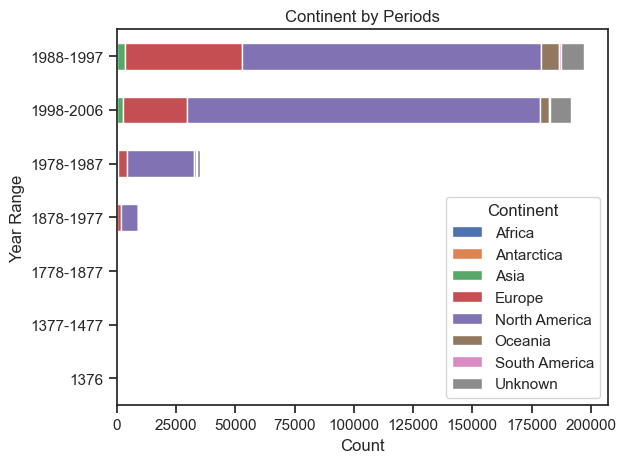

In [110]:
# Create bar chart for 'continent_year_range'

year_continent_group_bar = year_continent_group.plot.barh(stacked = True)

# Title and labels

plt.title('Continent by Periods')
plt.xlabel('Count')
plt.ylabel('Year Range')
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis/Visualizations/year_continent_group_bar.png'))

# Show the graph

plt.show()

In [111]:
# Group by 'Age Group', 'yearRange', and 'Continent'

age_year_continent = ratings_explicit.groupby(['Age Group','yearRange', 'Continent']).size().unstack()

age_year_continent = age_year_continent.loc[age_year_continent.sum(axis = 1).sort_values(ascending = True).index]

# Check output

age_year_continent

Continent                  Africa  Antarctica    Asia   Europe  North America  \
Age Group       yearRange                                                       
19-35 years old 1376          NaN         NaN     1.0      NaN            NaN   
                1377-1477     NaN         NaN     1.0      NaN            NaN   
                1778-1877     NaN         NaN     NaN      NaN            1.0   
75-90 years old 1878-1977     NaN         NaN     NaN      1.0           23.0   
                1978-1987     NaN         NaN     NaN      1.0           66.0   
5-18 years old  1878-1977     6.0         NaN    24.0     55.0          287.0   
75-90 years old 1988-1997     NaN         NaN     NaN     15.0          322.0   
                1998-2006     NaN         NaN     1.0      3.0          360.0   
56-74 years old 1878-1977     NaN         NaN     1.0    130.0          309.0   
5-18 years old  1978-1987     2.0         NaN    47.0     86.0          955.0   
56-74 years old 1978-1987     2.0         NaN     1.0    369.0         1364.0   
36-55 years old 1878-1977     2.0         NaN    22.0    396.0         2153.0   
19-35 years old 1878-1977     1.0         2.0   109.0   1075.0         4233.0   
5-18 years old  1998-2006    12.0         NaN   451.0   1006.0         5029.0   
                1988-1997    23.0         NaN   436.0   1453.0         4583.0   
56-74 years old 1988-1997     8.0         NaN    17.0   2387.0         6014.0   
                1998-2006     2.0         NaN     8.0    933.0         8254.0   
36-55 years old 1978-1987     3.0         NaN    60.0   1027.0         9025.0   
19-35 years old 1978-1987     7.0         2.0   290.0   2479.0        16942.0   
36-55 years old 1988-1997    37.0         NaN   431.0  11553.0        36043.0   
                1998-2006    26.0         NaN   418.0   6074.0        46732.0   
19-35 years old 1998-2006    66.0        16.0  1757.0  18890.0        88659.0   
                1988-1997    80.0        32.0  2519.0  33710.0        79231.0   

Continent                  Oceania  South America  Unknown  
Age Group       yearRange                                   
19-35 years old 1376           NaN            NaN      NaN  
                1377-1477      NaN            NaN      NaN  
                1778-1877      NaN            NaN      NaN  
75-90 years old 1878-1977      1.0            NaN      1.0  
                1978-1987      NaN            NaN      8.0  
5-18 years old  1878-1977     14.0            1.0      5.0  
75-90 years old 1988-1997     21.0            NaN     38.0  
                1998-2006      5.0            1.0     47.0  
56-74 years old 1878-1977     12.0            NaN      9.0  
5-18 years old  1978-1987     23.0            2.0     12.0  
56-74 years old 1978-1987     58.0            1.0     54.0  
36-55 years old 1878-1977     48.0            2.0     35.0  
19-35 years old 1878-1977    198.0            7.0    329.0  
5-18 years old  1998-2006    154.0           13.0     72.0  
                1988-1997    379.0           68.0     91.0  
56-74 years old 1988-1997    547.0           66.0    280.0  
                1998-2006    160.0            5.0    363.0  
36-55 years old 1978-1987    178.0           21.0    189.0  
19-35 years old 1978-1987    571.0           34.0   1362.0  
36-55 years old 1988-1997   1432.0          258.0    866.0  
                1998-2006    746.0          103.0   1012.0  
19-35 years old 1998-2006   2730.0          183.0   7386.0  
                1988-1997   5203.0          459.0   8657.0

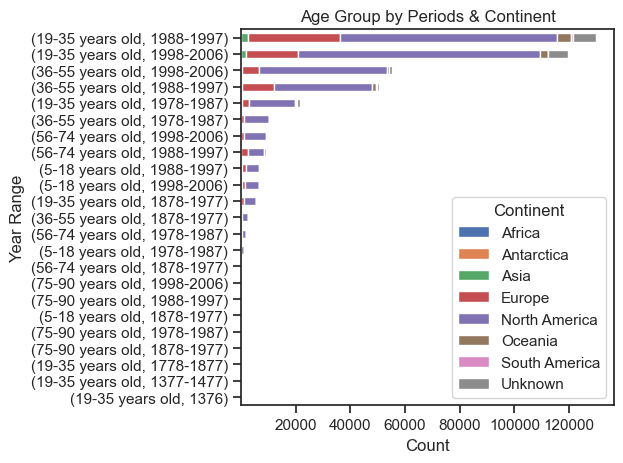

In [112]:
# Create bar chart for 'age_year_continent'

age_year_continent_bar = age_year_continent.plot.barh(stacked = True)

# Title and labels

plt.title('Age Group by Periods & Continent')
plt.xlabel('Count')
plt.ylabel('Year Range')
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis/Visualizations/age_year_continent_bar.png'))

# Show the graph

plt.show()

### *Answers for Question 5*:

 Are there noticeable differences in reading levels among age groups?*
    
- As mentioned earlier for the question number 2, the data analysis showcases the 19-35 years old group as
the most regular readers between 1988 and 2006, followed by the 36-55 years old group for the same period

In [113]:
# Exporting 'df' dataframe

df.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'df.pkl'))

In [114]:
# Exporting 'ratings_implicit' dataframe

ratings_implicit.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'ratings_implicit.pkl'))

In [115]:
# Exporting 'ratings_explicit' dataframe

ratings_explicit.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'ratings_explicit.pkl'))